# Austin Housing Price Prediction

Data Source: Kaggle (https://www.kaggle.com/datasets/ericpierce/austinhousingprices?select=austinHousingData.csv)

## Task

-  Description of Austin house current status
-  Build a linear regression to predict the housing price 

In [1]:
# Dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Ignore the version warning
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# unzip the data source
import zipfile 
# Zip file source path
zip_file_path = "./source/austinHousingData.csv.zip"
# Unzip
zip_file_ref = zipfile.ZipFile(zip_file_path, 'r')
zip_file_ref.extractall("./source/")
zip_file_ref.close()

In [2]:
# Load the csv file
df_file_path = "./source/austinHousingData.csv"
raw_data = pd.read_csv(df_file_path, encoding="utf-8")
raw_data.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [73]:
missing_values = raw_data.isna().sum()
print(f"Missing values in each column: {missing_values}")

Missing values in each column: zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   2
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWate

In [3]:
raw_data.count()

zpid                          15171
city                          15171
streetAddress                 15171
zipcode                       15171
description                   15169
latitude                      15171
longitude                     15171
propertyTaxRate               15171
garageSpaces                  15171
hasAssociation                15171
hasCooling                    15171
hasGarage                     15171
hasHeating                    15171
hasSpa                        15171
hasView                       15171
homeType                      15171
parkingSpaces                 15171
yearBuilt                     15171
latestPrice                   15171
numPriceChanges               15171
latest_saledate               15171
latest_salemonth              15171
latest_saleyear               15171
latestPriceSource             15171
numOfPhotos                   15171
numOfAccessibilityFeatures    15171
numOfAppliances               15171
numOfParkingFeatures        

In [4]:
raw_data.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [10]:
raw_data.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


## Part 1: Data Exploration & Analysis

In [43]:
# raw_data['latestPrice'].describe()
max_date = raw_data['latest_saledate'].max()
min_date = raw_data['latest_saledate'].min()
print(min_date, max_date)

2018-01-22 2021-01-30


In [18]:
# Configure the seaborn 
sns.set_style("white")

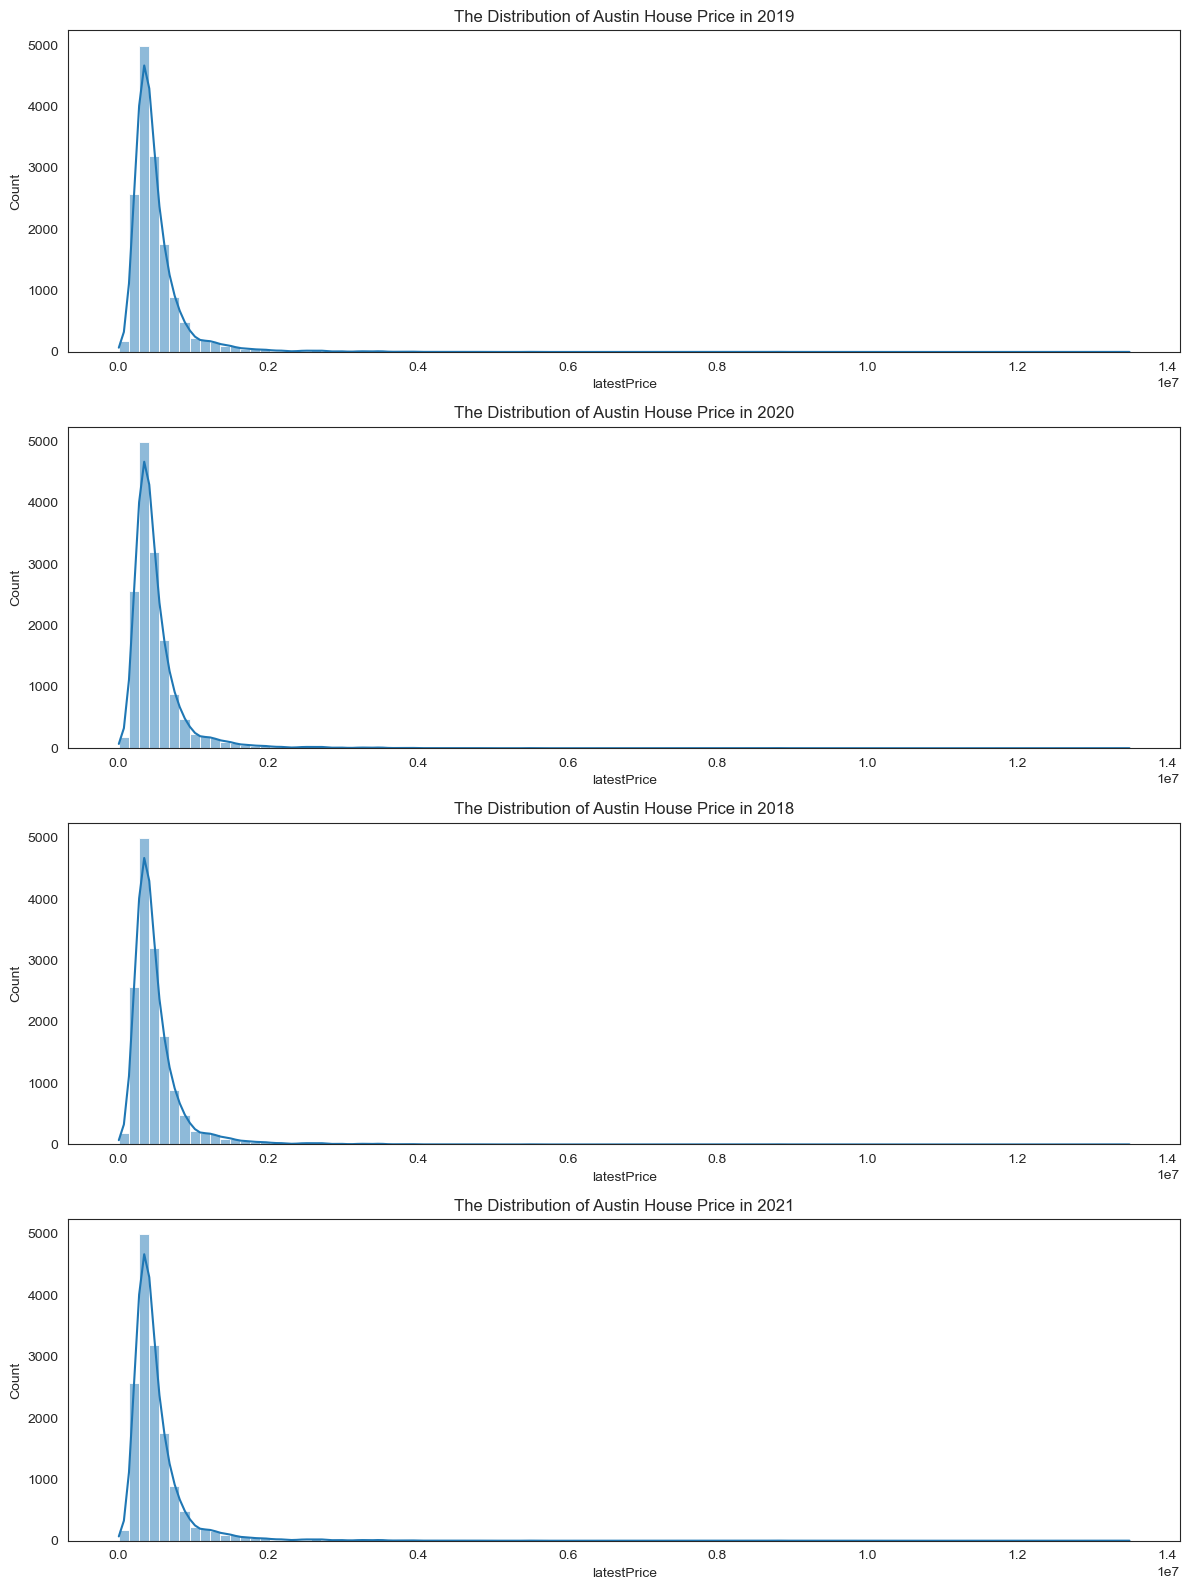

In [19]:
# Histogram of House Price Distribution
# Find the year
years = raw_data['latest_saleyear'].unique()

# Set the figures size
plt.figure(figsize=(12,16))

for i, year in enumerate(years):
    plt.subplot(len(years), 1, i + 1)
    sns.histplot(raw_data['latestPrice'], bins=100, kde=True)
    plt.title(f'The Distribution of Austin House Price in {year}')

# Display the figures
plt.tight_layout()
plt.savefig("./outputs/The Distribution of Austin House Price in each year.png")
plt.show()

#### Observation and Analysis

1. Overall Shape of Housing Prices

- The distribution of housing prices in each year is similar, showing a clear right-skewed pattern.
- Most house prices are concentrated in the lower range, with a few significantly higher than the average.

2. Concentration Range of Housing Prices by Year

- Each year, most house prices are concentrated between 0 to approximately 0.2 million dollars (i.e., 0 to 200 thousand dollars).

3. Extremely High-Priced Houses

- In all years, there are a small number of houses with extremely high prices that far exceed others.

4. Trend in Housing Price Changes

- There is no significant change in the distribution of housing prices across different years, indicating that the overall shape has remained relatively stable over these years.

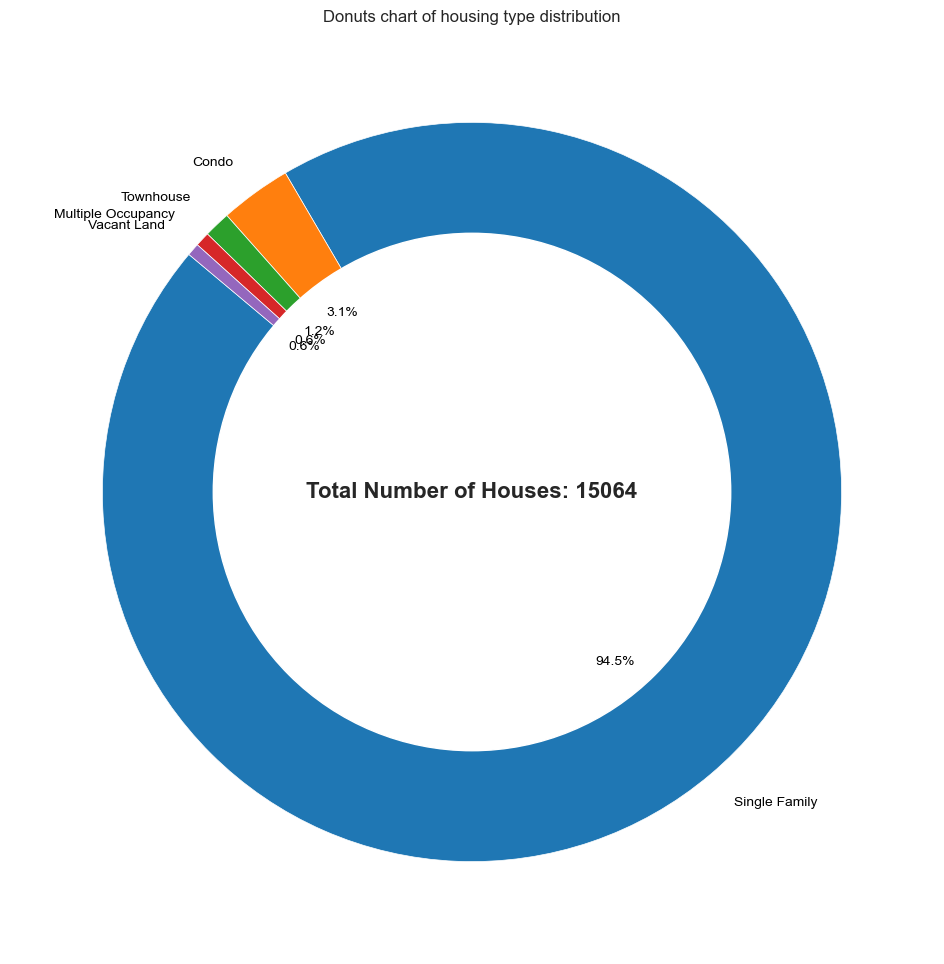

In [28]:
# Donuts chart of housing type distribution

# Count the number of the house type
counts_house_type = (raw_data['homeType'].value_counts()
                    .head(5)
                    .reset_index()
                    )
counts_house_type.columns = ['HouseType', 'Counts']

# Count the total number of house
total_number_of_houses = counts_house_type['Counts'].sum()

# Drow the Donuts chart
plt.figure(figsize=(12,12))
wedges, texts, autotexts = plt.pie(counts_house_type['Counts'], labels=counts_house_type['HouseType'], autopct='%1.1f%%',
 startangle=140, wedgeprops={'linewidth': 0.5, 'width': 0.4})

# Configure the text attributes
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

# Configure the center color
centre_circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add total number of houses text in the center
plt.text(0, 0, f'Total Number of Houses: {total_number_of_houses}', ha='center', va='center', fontweight='bold', fontsize=16)

plt.title('Donuts chart of housing type distribution')
plt.savefig('./outputs/Donuts chart of housing type distribution.png')
plt.show()

#### Observation and Analysis

- Single Family homes dominate, accounting for approximately 94.5% of the total number of houses.
- The number of Condos, Townhouses, Multiple Occupancy residences, Vacant Land, and other types of housing is relatively small, ranging from 3.1% to 0.1%.

- The chart shows a total of 15,064 houses.

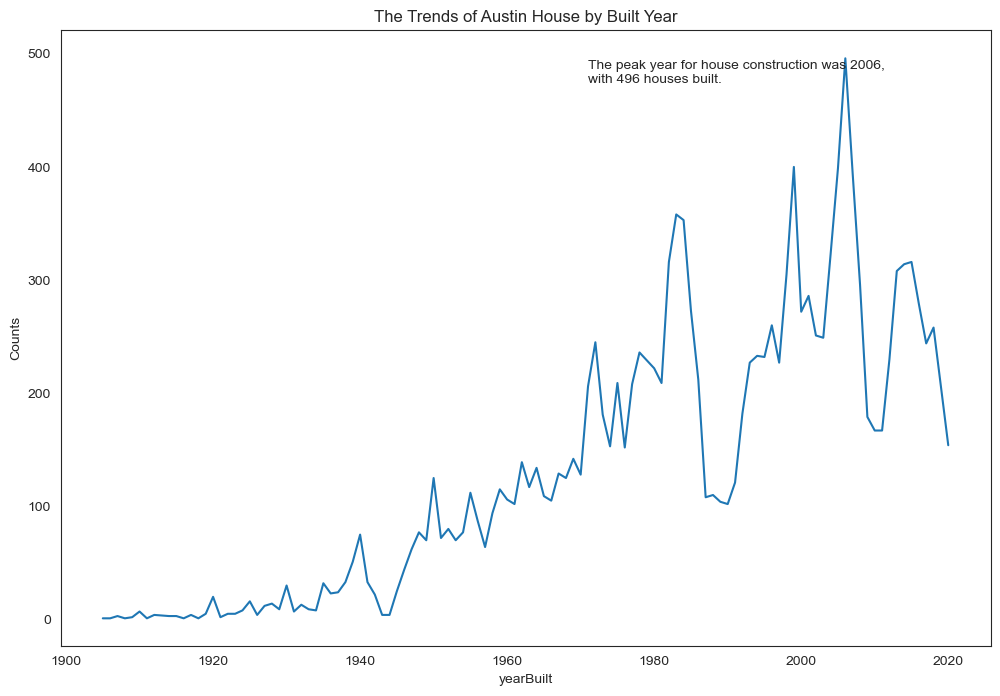

In [29]:
# Line Chart of House Year by Built Year

# Count the house number by built year
counts_house_by_built_year = (raw_data['yearBuilt'].value_counts()
                     .sort_values()
                     .reset_index()
                     )
counts_house_by_built_year.columns = ['yearBuilt', 'Counts']

# Calculate the max_counts and max_count_year
max_counts = counts_house_by_built_year['Counts'].max()
max_counts_year = counts_house_by_built_year[counts_house_by_built_year['Counts'] == max_counts]['yearBuilt'].values[0]

# Build a line chart
plt.figure(figsize=(12,8))
sns.lineplot(data=counts_house_by_built_year, 
             x='yearBuilt', y='Counts')

plt.title(f'The Trends of Austin House by Built Year')
plt.annotate(f"The peak year for house construction was {max_counts_year},\nwith {max_counts} houses built.",
             xy=(max_counts_year, max_counts), xytext=(max_counts_year - 35, max_counts - 1),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             horizontalalignment='left', verticalalignment='top')
plt.savefig("./outputs/Trends of Austin House by Built Year.png")
plt.show()

#### Observation and Analysis

**Historical Trends in House Construction**

- **Early Construction**: The number of houses built gradually increased from 1900 to 1950.
- **Mid-term Growth**: From 1950 to 2000, the number of houses built generally rose, showing stable growth.
- **Construction Peak**: Reached a peak in 2006 with a total of 496 houses built.
- **Recent Changes**: After 2006, the number of houses constructed significantly declined but still showed fluctuations.

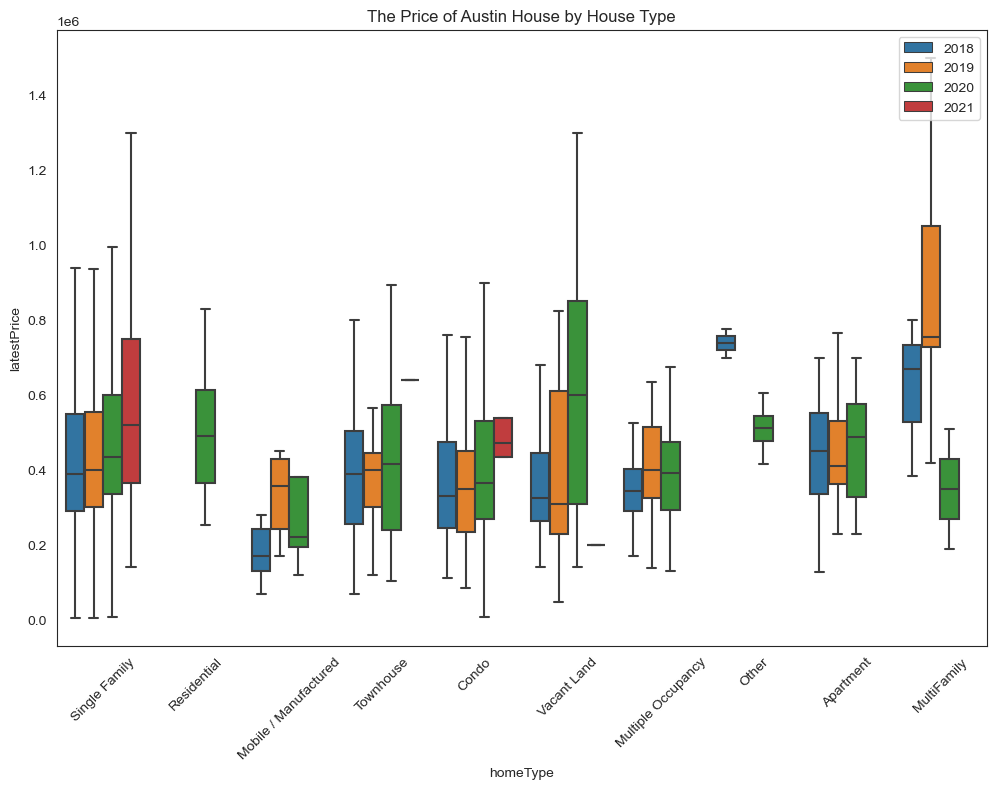

In [36]:
# Box plot of house prices over the years
plt.figure(figsize=(12,8))
sns.boxplot(data=raw_data, x='homeType', y='latestPrice', hue='latest_saleyear', showfliers=False) # hidden the Outlier

# Configure The figures attributes
plt.title(f'The Price of Austin House by House Type')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('./outputs/Price of Austin House by House Type(Box Plot).png')
plt.show()

#### Distribution of Prices for Various Types of Housing
• Single Family: The price distribution of single-family homes is wide, but most are concentrated in the lower price range.
• Residential: The price distribution of residential housing is relatively concentrated, with a relatively high median price.
• Mobile/Manufactured: The price distribution of mobile homes is narrow, and overall prices are low.
• Townhouse: The price distribution of townhouses is more concentrated, with a higher median price.
• Condo: The price distribution of condos is wide, with a higher median price.
• Vacant Land: The price distribution for vacant land is more concentrated, with a relatively low median price.
• Multiple Occupancy: The price distribution for multiple occupancy homes is more concentrated, with a relatively low median price.
• Other: Price distributions for other types of housing are more concentrated, with a higher median price.
• Apartment: Apartment prices have a wide distribution but most are in the lower-price range. 
• Multifamily: Multifamily home prices have a wide distribution but most are in the lower-price range.

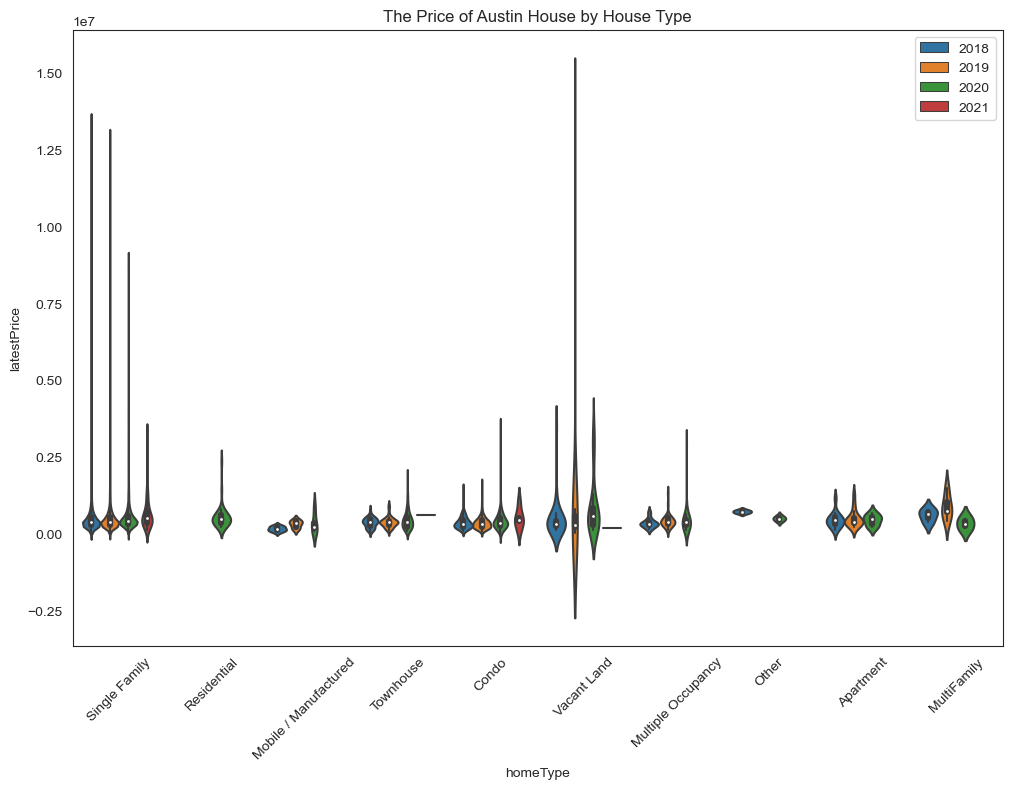

In [37]:
# Violin plot of house prices over the years
# The violin plot displays the kernel density estimate (KDE) of data, reflecting the shape of its distribution. Through symmetrical vertical curves, one can intuitively see the concentration and range of data at different values.
plt.figure(figsize=(12,8))
sns.violinplot(data=raw_data, x='homeType', y='latestPrice', hue='latest_saleyear', showfliers=False) # hidden the Outlier

# Configure The figures attributes
plt.title(f'The Price of Austin House by House Type')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('./outputs/Price of Austin House by House Type(Violin Plot).png')
plt.show()

#### Observation and Analysis

Compared to box plots, violin plots provide more detailed information about data distribution. Specifically, violin plots supplement the following:

1. Data Density
- The width shows where data is concentrated in certain price ranges and where it is sparse. The wider the plot, the higher the data density in that range.

2. Symmetry and Multimodal Distribution
- Certain types of houses (such as single-family homes) may have multiple high-density peaks in different price ranges, which are not easily noticeable in box plots.

3. Overall Shape
- In the data for single-family homes, it can be clearly seen that most of the data is concentrated at lower prices, but there are also some distributions of high-priced houses.

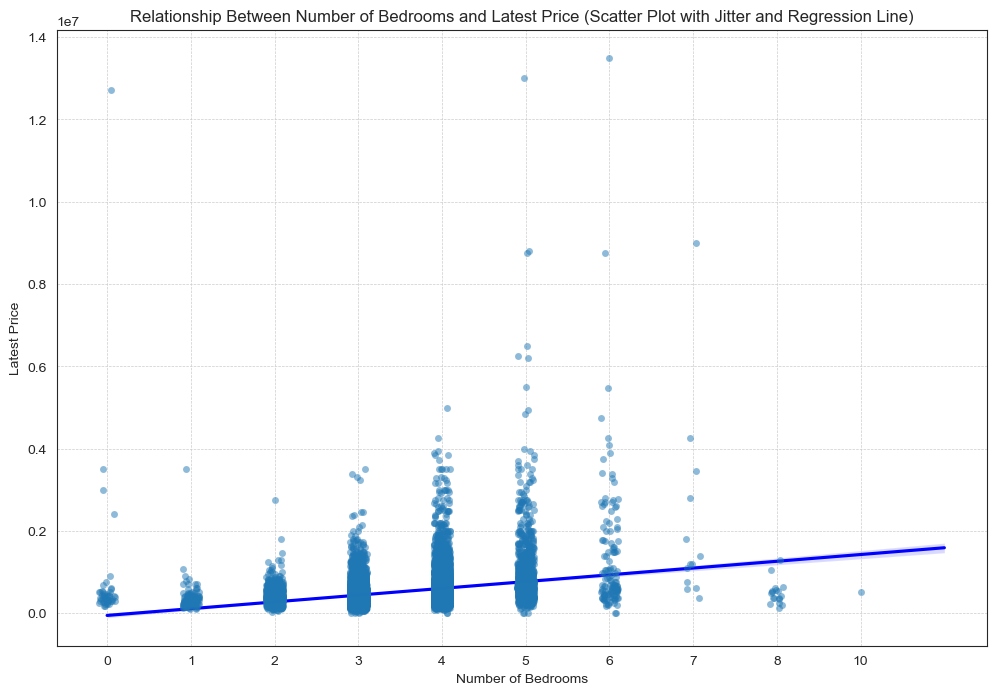

In [266]:
# Filter Data, only including numOfBedrooms < 11
filtered_data = raw_data[raw_data['numOfBedrooms'] < 11]

# Trick Part: In `seaborn`, you can use `seaborn.stripplot` combined with `seaborn.regplot` to create scatter plots, regression lines, and jitter effects. `seaborn.stripplot` can add jitter effects, while `seaborn.regplot` can add regression lines. To achieve the desired visualization effect, I combine these two plots.

# Configure plot size
plt.figure(figsize=(12, 8))

# Use strip plot to draw a scatter plot with jitter effect 
sns.stripplot(x='numOfBedrooms', y='latestPrice', data=filtered_data, jitter=True, alpha=0.5)

# Use regplot to draw regression line
sns.regplot(x='numOfBedrooms', y='latestPrice', data=filtered_data, scatter=False, color='blue')

# Add Title and labels
plt.title('Relationship Between Number of Bedrooms and Latest Price (Scatter Plot with Jitter and Regression Line)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Latest Price')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('./outputs/Relationship_Between_Number_of_Bedrooms_and_Latest_Price.png')
plt.show()

#### Observation and Analysis

1. Relationship between Number of Bedrooms and House Prices

- The chart shows the relationship between the number of bedrooms and house prices, with a scatter plot plus jitter to more clearly see data distribution.
- The scatter plot indicates a positive correlation between an increasing number of bedrooms and house prices, meaning houses with more bedrooms tend to be priced higher.
- The regression line suggests that while an increase in the number of bedrooms has a positive impact on house prices, the degree of influence is relatively small.

2. Data Distribution and Outliers

- Most data are concentrated in the range of 3 to 6 bedrooms, with prices below $1 million.
- There are some outliers, such as high-priced houses over $1 million whose bedroom count isn't necessarily high, indicating special cases within the data.

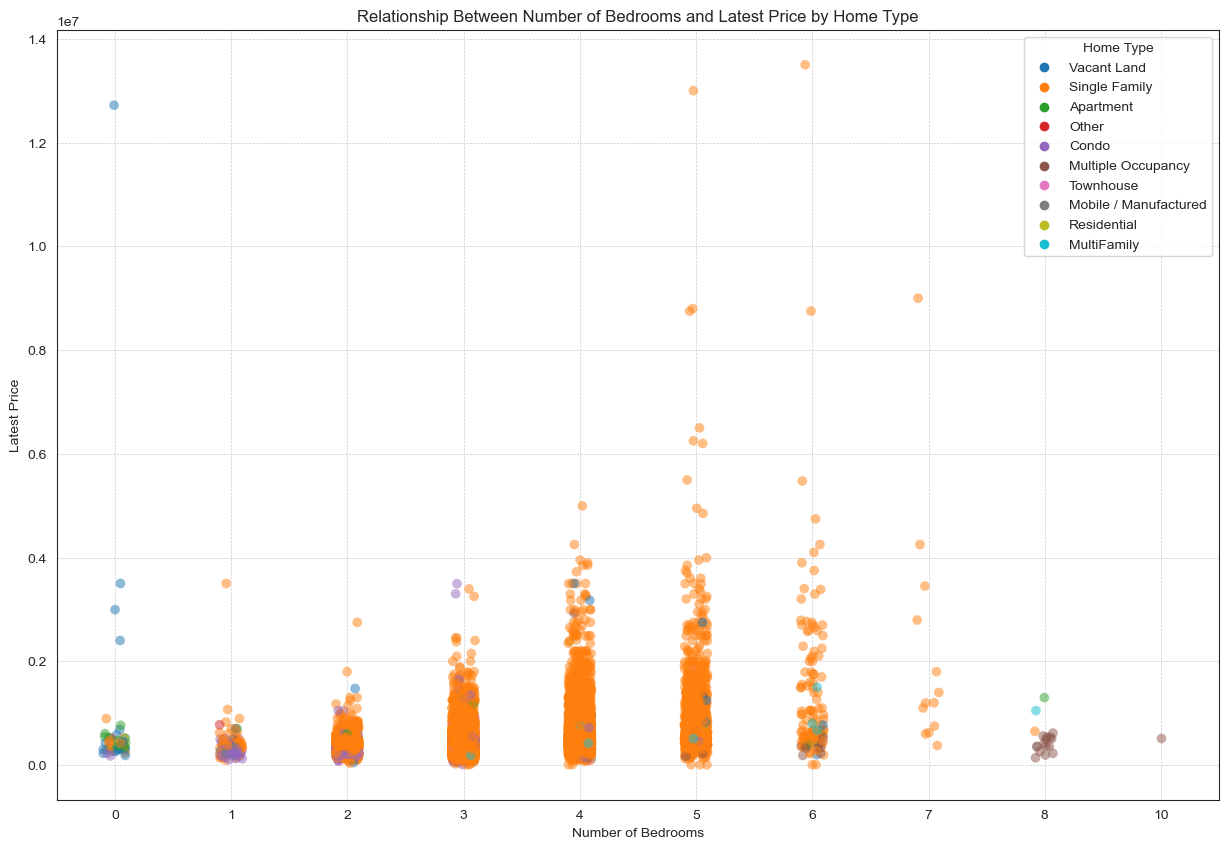

In [274]:
# Categorical Analysis: Relationship Between Number of Bedrooms and House Prices for Different Types of Houses (Without Regression Line)

plt.figure(figsize=(15, 10))
sns.stripplot(data=filtered_data, x='numOfBedrooms', y='latestPrice', hue='homeType', alpha=0.5, s=7)
plt.title('Relationship Between Number of Bedrooms and Latest Price by Home Type')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Latest Price')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Home Type')
plt.savefig('./outputs/Relationship Between Number of Bedrooms and Latest Price by Home Type.png')
plt.show()

#### Observation and Analysis

The Relationship Between the Number of Bedrooms and House Prices for Different Types of Housing

• Single Family: Single-family homes are distributed across various bedroom ranges, with a wide price range. An increase in the number of bedrooms is usually accompanied by an increase in house prices, but there are exceptions.
• Apartment: Apartments typically have fewer bedrooms, usually between 1 to 3 bedrooms, with prices concentrated in the lower price range.
• Townhouse: Townhouses mainly have between 2 to 4 bedrooms, with relatively concentrated price distribution.
• Condo: Condos also generally have between 2 to 3 bedrooms, with a wide price range.
• Vacant Land: Vacant land has zero bedrooms and relatively low prices.

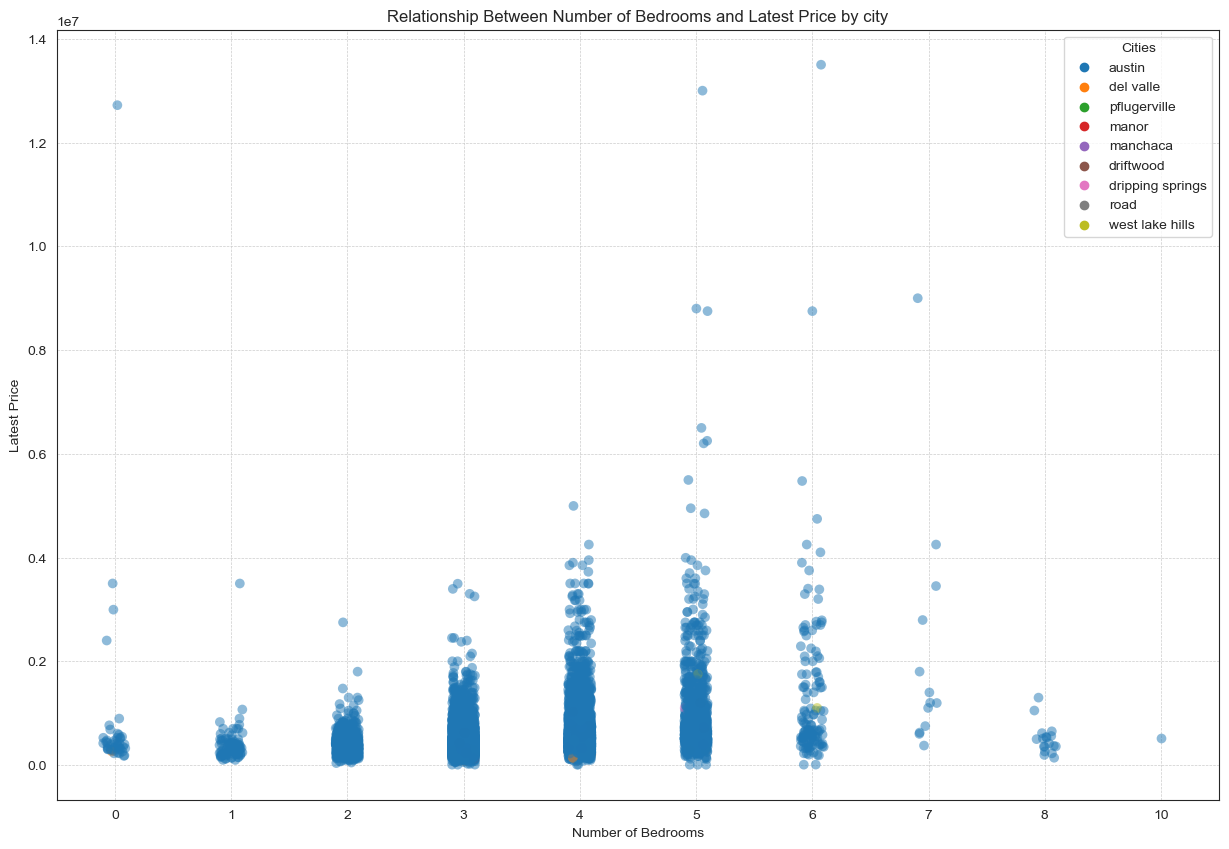

In [283]:
# Regional Analysis: The Impact of Bedroom Count on Housing Prices in Different Areas (Without Regression Line)
plt.figure(figsize=(15, 10))
sns.stripplot(data=filtered_data, x='numOfBedrooms', y='latestPrice', hue='city', alpha=0.5, s=7)
plt.title('Relationship Between Number of Bedrooms and Latest Price by city')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Latest Price')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Cities')
plt.savefig('./outputs/Relationship Between Number of Bedrooms and Latest Price by city.png')
plt.show()

#### Observation and Analysis

1. Relationship between the number of bedrooms and house prices in different cities

- **Austin**: Data is mainly concentrated on 2 to 5 bedrooms, with a wide price distribution, some being relatively high.
- **Other cities**: Such as Del Valle, Pflugerville, Manor, Manchaca, etc., data is sparse and prices are concentrated in the lower range.
- **West Lake Hills**: Prices are widely distributed with some high-priced houses.

2. Price outliers

- Austin and West Lake Hills have some high-price outliers; these houses usually have more bedrooms.
- Data distribution in other cities is concentrated with a small price range.

3. Data concentration

- Most houses have between 2 to 5 bedrooms, with prices mostly below $600K.

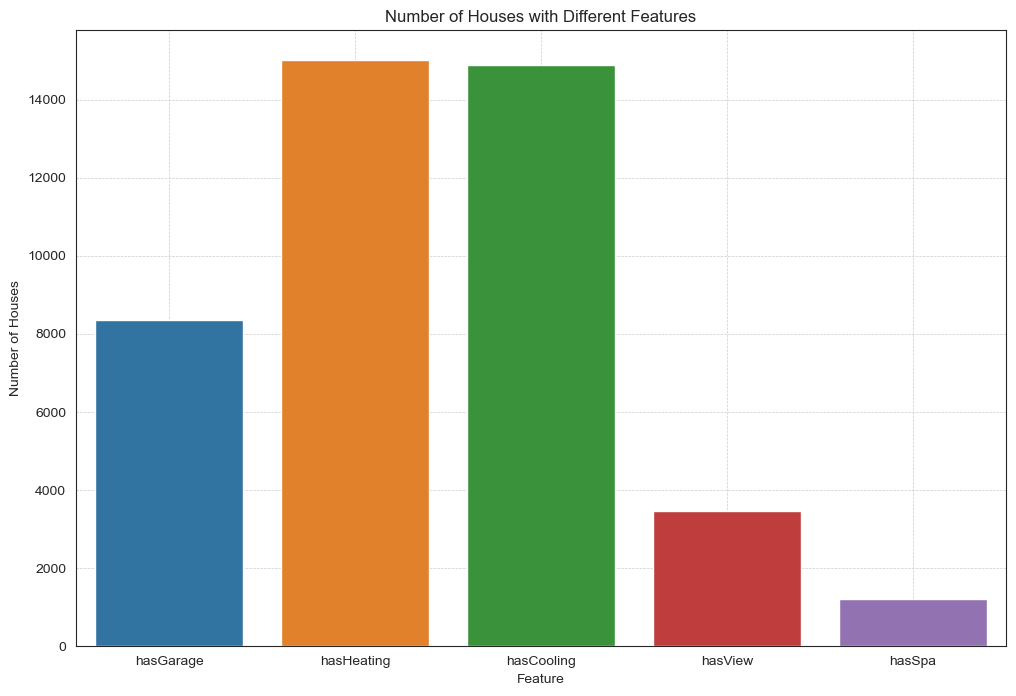

In [57]:
# Bar Chart of House Features 

# Count the numbers of each feather
features = ['hasGarage', 'hasHeating', 'hasCooling', 'hasView', 'hasSpa']
counts = {feature: raw_data[feature].sum() for feature in features}
counts_df = pd.DataFrame(list(counts.items()), columns=['Feature', 'Count'])

# Build a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Count', data=counts_df)

# Add title and labels
plt.title('Number of Houses with Different Features')
plt.xlabel('Feature')
plt.ylabel('Number of Houses')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.savefig('./outputs/Number of Houses with Different Features(bar chart).png')
plt.show()

#### Observation and Analysis

Distribution of Features:
• hasGarage: Approximately 55% of houses are equipped with a garage.
• hasHeating: About 99% of houses have a heating system, which is a feature present in almost all homes.
• hasCooling: Around 98% of houses are equipped with cooling systems, also common in most homes.
• hasView: Approximately 22.8% of houses have a view, making this feature relatively rare.
• hasSpa: Only about 7.9% of houses are equipped with spa facilities, the least common feature.

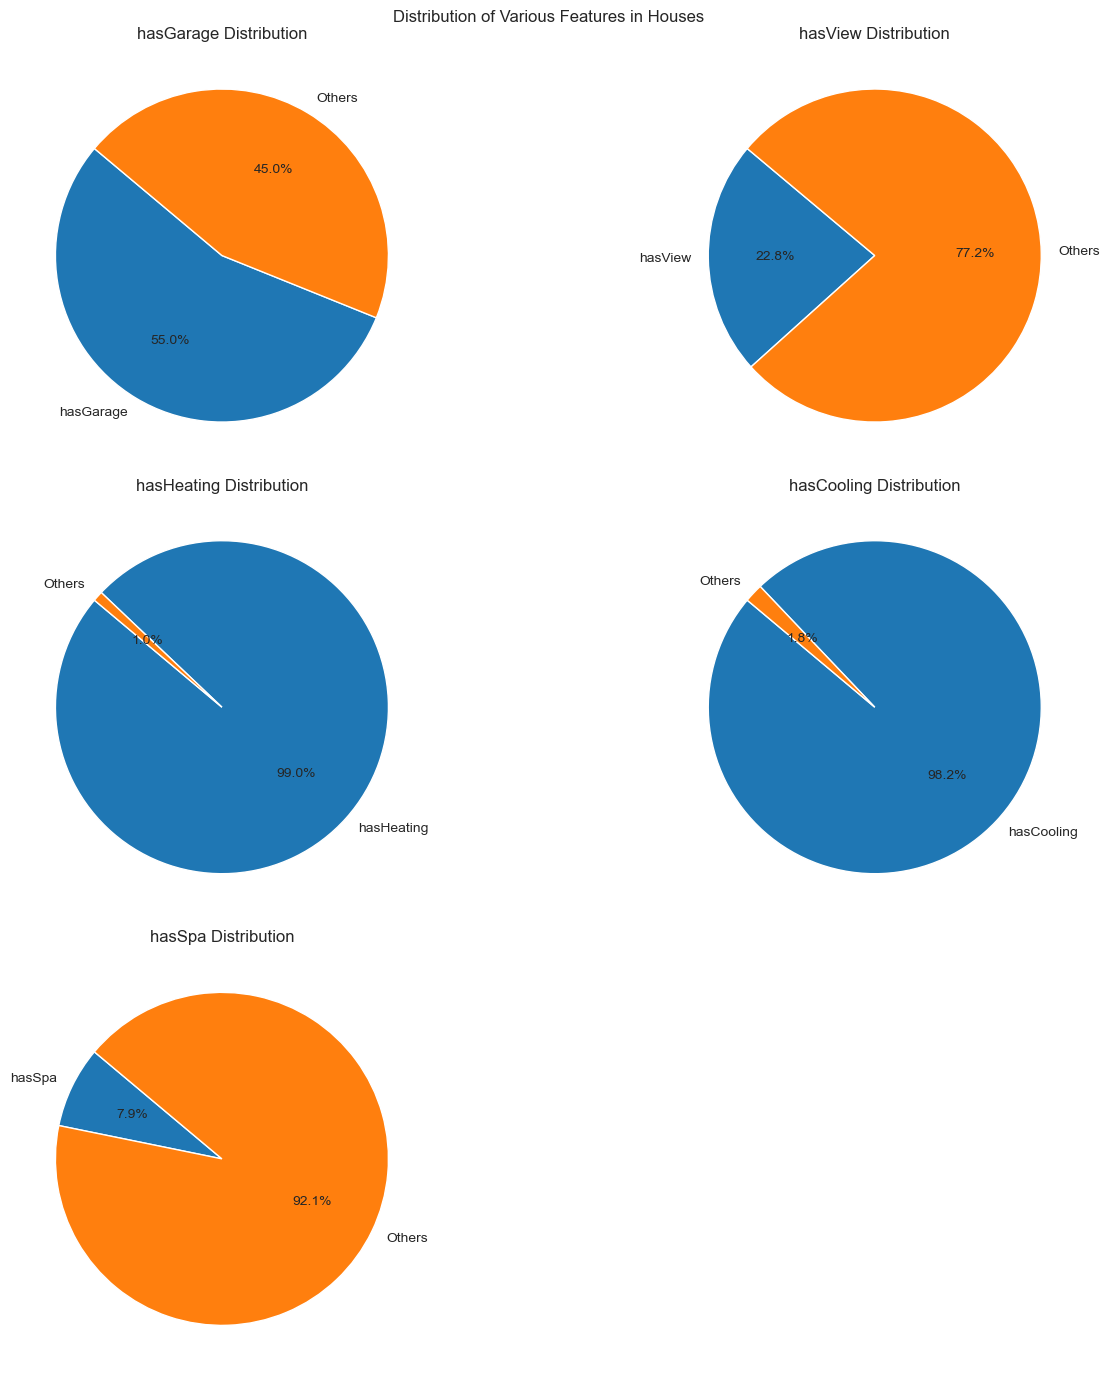

In [61]:
# Try pie chart
# Calculate the number of each feather
features = ['hasGarage', 'hasView', 'hasHeating', 'hasCooling', 'hasSpa']
counts = {feature: raw_data[feature].sum() for feature in features}
counts_df = pd.DataFrame(list(counts.items()), columns=['Feature', 'Count'])

# Calculate the ratio of each feather
total_houses = len(raw_data)
counts_df['Percentage'] = (counts_df['Count'] / total_houses) * 100

# Build the pie chart
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

for i, feature in enumerate(features):
    sizes = [counts_df.loc[counts_df['Feature'] == feature, 'Count'].values[0], total_houses - counts_df.loc[counts_df['Feature'] == feature, 'Count'].values[0]]
    labels = [f'{feature}', 'Others']
    row = i // 2
    col = i % 2
    axs[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axs[row, col].set_title(f'{feature} Distribution')

# Remove the extra subplots
for j in range(len(features), 6):
    fig.delaxes(axs.flatten()[j])

plt.suptitle('Distribution of Various Features in Houses')
plt.tight_layout()
plt.savefig('./outputs/Distribution of Various Features in Houses(Combined pie chart).png')
plt.show()

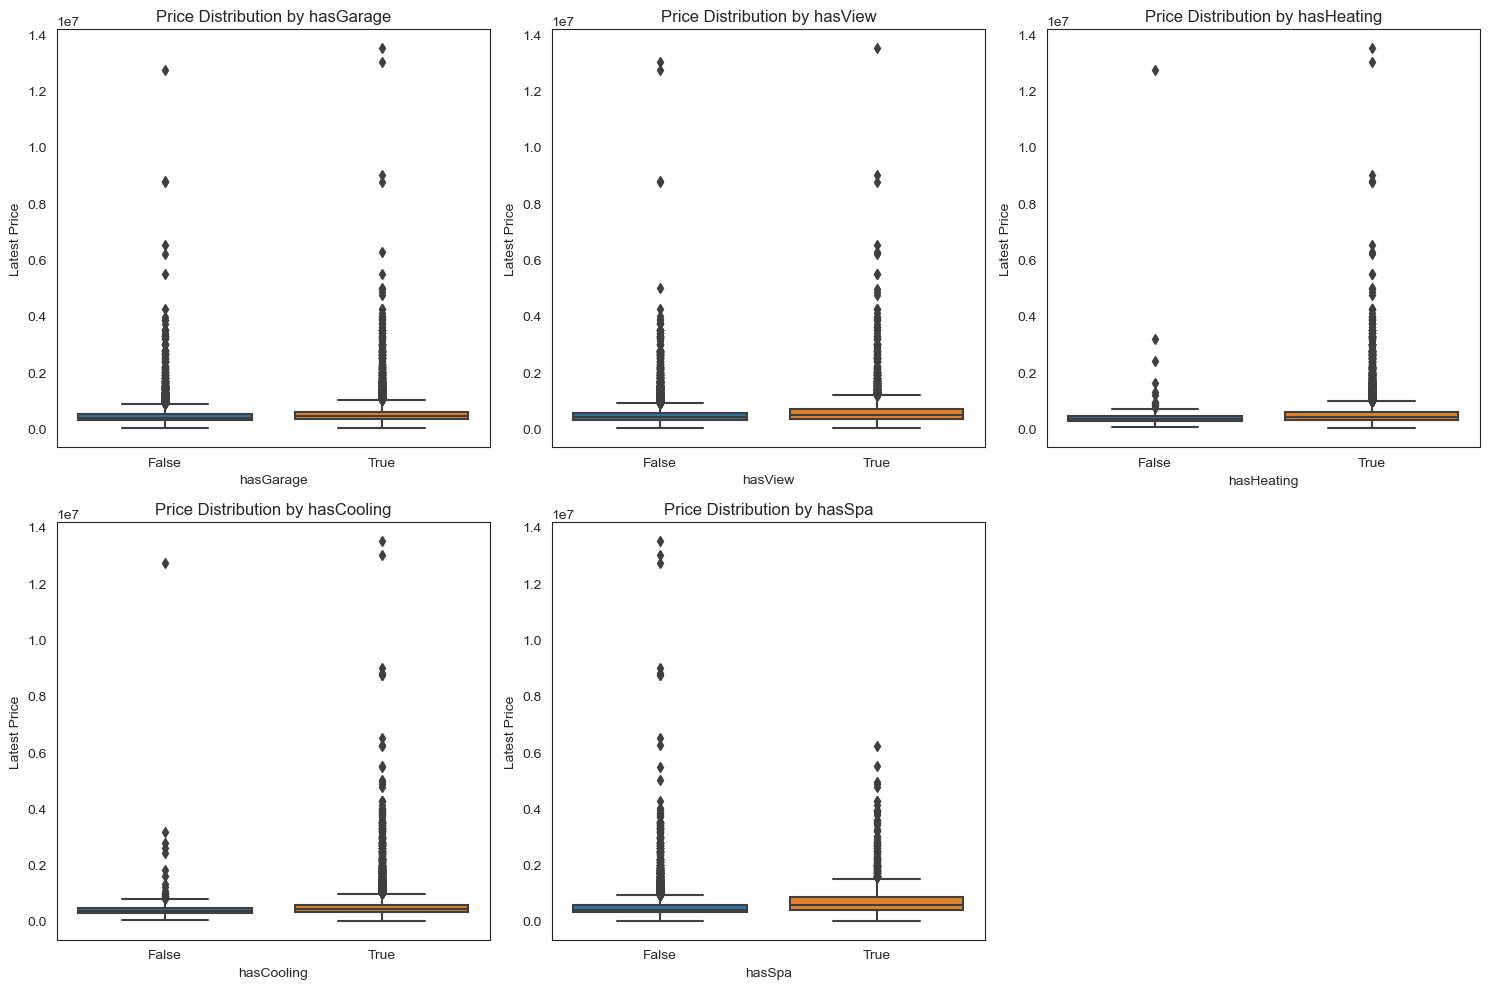

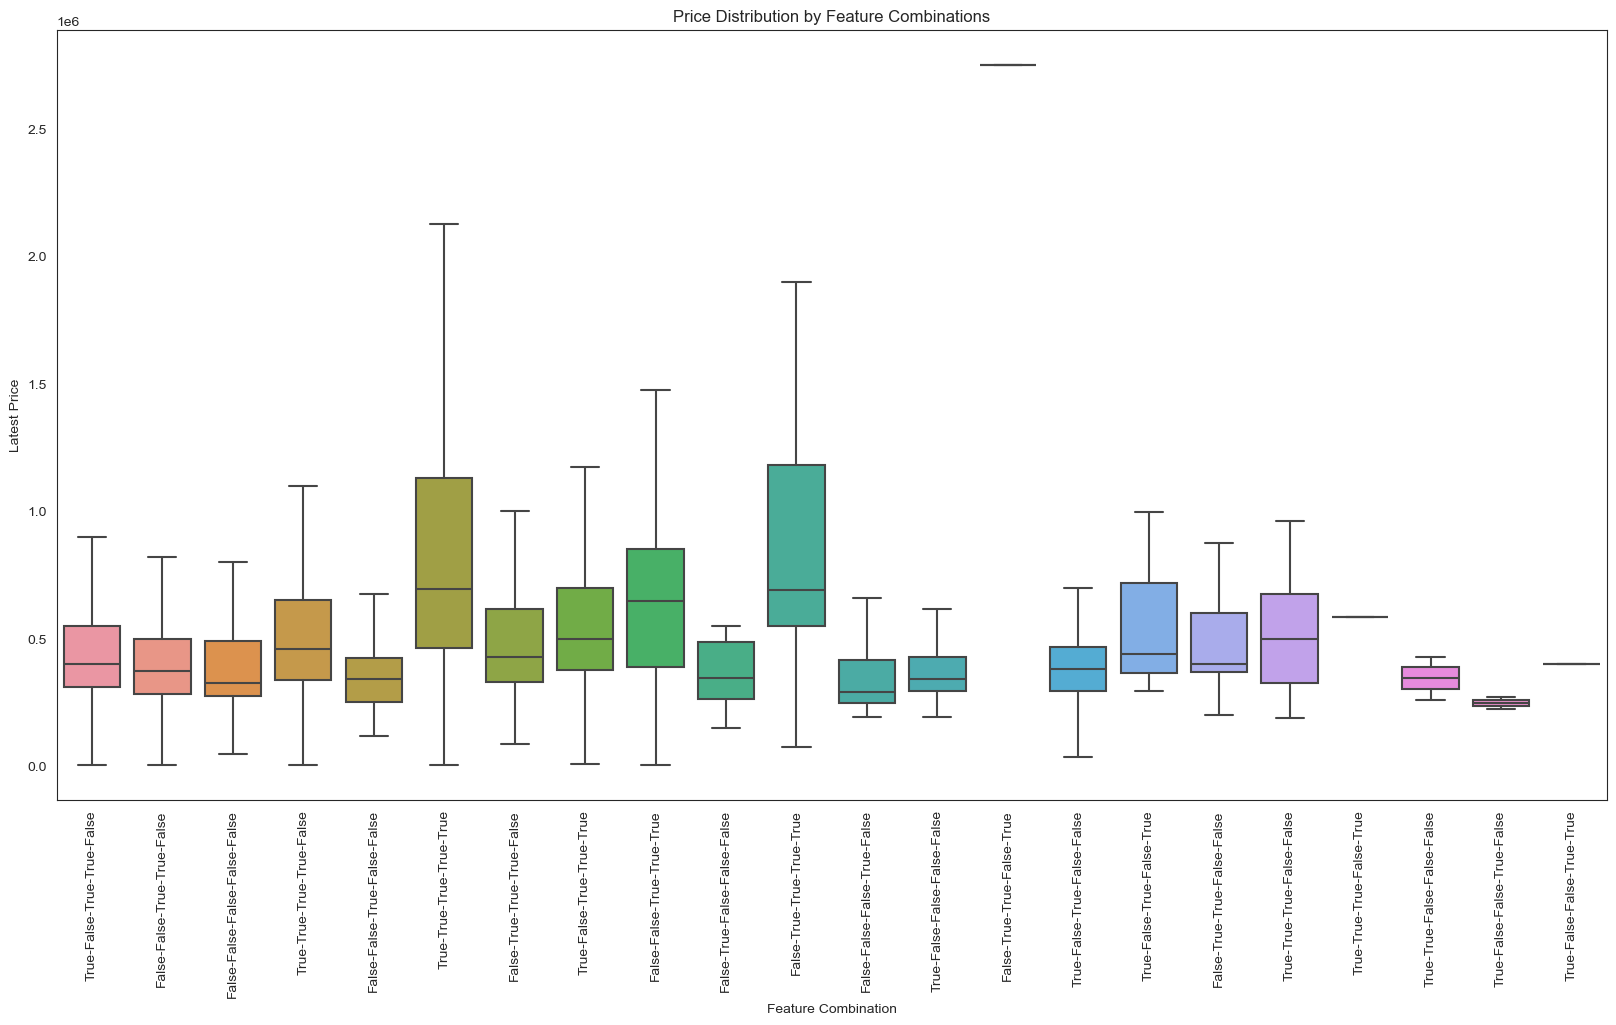

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [290]:
import statsmodels.api as sm

# Copy the original data
selected_data = raw_data.copy()

# Select features for analysis
features = ['hasGarage', 'hasView', 'hasHeating', 'hasCooling', 'hasSpa']

# Ensure all features are numeric
selected_data[features] = selected_data[features].apply(pd.to_numeric, errors='coerce')
selected_data['latestPrice'] = pd.to_numeric(selected_data['latestPrice'], errors='coerce')

# Drop rows with NaN values in selected features or latestPrice
selected_data.dropna(subset=features + ['latestPrice'], inplace=True)

# Analysis of the relationship between individual features and house prices
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, y='latestPrice', data=selected_data)
    plt.title(f'Price Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Latest Price')
plt.tight_layout()
plt.show()

# Analysis of the relationship between feature combinations and house prices
# Create a column that contains all feature combinations
selected_data['feature_combination'] = selected_data[features].astype(str).agg('-'.join, axis=1)

plt.figure(figsize=(20, 10))
sns.boxplot(x='feature_combination', y='latestPrice', data=selected_data, showfliers=False)
plt.title('Price Distribution by Feature Combinations')
plt.xlabel('Feature Combination')
plt.ylabel('Latest Price')
plt.xticks(rotation=90)
plt.show()

# Multivariable regression analysis
# Select features and target variable
X = selected_data[features]
y = selected_data['latestPrice']

# Add a constant column for regression analysis
X = sm.add_constant(X)

# Create regression model and fit it
model = sm.OLS(y, X).fit()

# Output regression analysis results
print(model.summary())

#### Observation and Analysis

Distribution of Features:

- In terms of quantity, heating and cooling systems are the most common features in houses, likely because these features are necessary in certain climates.
- Garages are also a common feature, with about half of the houses equipped with one.
- Houses with landscaping and spa facilities are relatively fewer; these features might be considered as luxury or additional amenities.

## Part 2: Geographical Analysis

In [86]:
geo_analysis_data_cols = ['city', 'zipcode', 'latestPrice', 
                          'latitude', 'longitude','latest_saleyear' ]
geo_analysis_data = raw_data[geo_analysis_data_cols]
geo_analysis_data

,city,zipcode,latestPrice,latitude,longitude,latest_saleyear
0,pflugerville,78660,305000.0,30.430632,-97.663078,2019
1,pflugerville,78660,295000.0,30.432673,-97.661697,2020
2,pflugerville,78660,256125.0,30.409748,-97.639771,2019
3,pflugerville,78660,240000.0,30.432112,-97.661659,2018
4,pflugerville,78660,239900.0,30.437368,-97.656860,2018
...,...,...,...,...,...,...
15166,austin,78748,330000.0,30.161997,-97.816345,2020
15167,austin,78741,550000.0,30.240223,-97.772835,2020
15168,austin,78704,875000.0,30.244835,-97.761124,2021
15169,austin,78722,420000.0,30.281569,-97.717789,2019


In [87]:
missing_values = geo_analysis_data.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
city               0
zipcode            0
latestPrice        0
latitude           0
longitude          0
latest_saleyear    0
dtype: int64


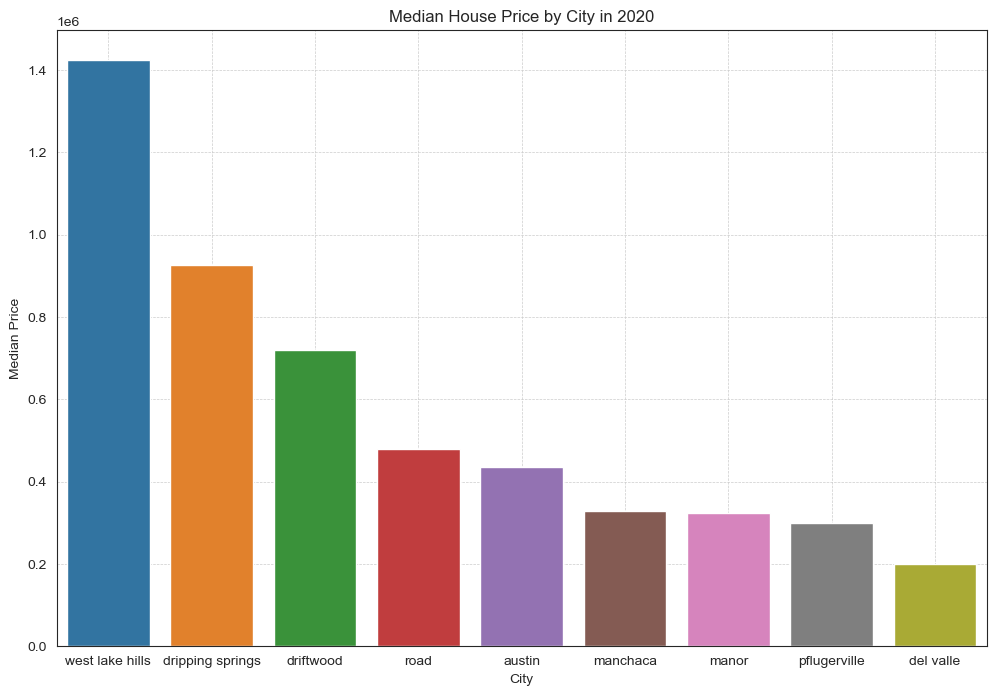

In [134]:

# Bar Chart of Median City Housing Prices
# Due to the completion of data for certain years, here we select the 2020 data to display the median house prices in each district.
median_price_data =geo_analysis_data[geo_analysis_data['latest_saleyear'] == 2020]
median_price_per_city = (median_price_data
                  .groupby('city')
                  .median()
                  .rename(columns={'latestPrice': 'median_price'})
                  .sort_values(by='median_price', ascending=False)
                  .reset_index()
                  )

plt.figure(figsize=(12, 8))
sns.barplot(x='city', y='median_price', data=median_price_per_city)
plt.title('Median House Price by City in 2020')
plt.xlabel('City')
plt.ylabel('Median Price')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('./outputs/Median_house_price_by_city_2020.png')
plt.show()

#### Observation and Analysis

- West Lake Hills is significantly higher than other cities, indicating its status as a high-end residential area.
- Dripping Springs and Driftwood follow closely behind, also showing relatively high median home prices.
- Austin's home prices are at a moderate level, while its surrounding areas such as Manchaca, Manor, Pflugerville, and Del Valle offer more affordable options.

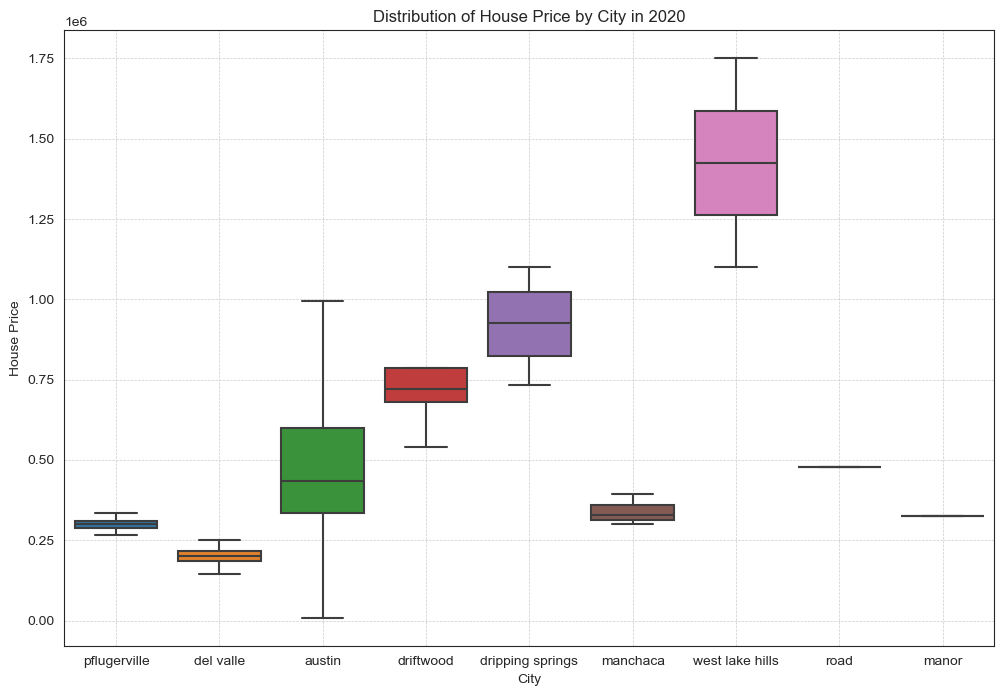

In [135]:
# Box Plot of City Housing Prices

# build box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='latestPrice', data=median_price_data, showfliers=False)

plt.title('Distribution of House Price by City in 2020')
plt.xlabel('City')
plt.ylabel('House Price')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('./outputs/Distribution_of_house_price_by_city_2020.png')
plt.show()

#### Observation and Analysis

- **Price Distribution**: The distribution of housing prices across various cities shows significant differences. West Lake Hills has the highest prices with large fluctuations, while cities like Pflugerville and Del Valle offer more affordable housing with smaller price variations.
- **Market Stability**: Some cities such as Dripping Springs and Driftwood have relatively concentrated housing prices, indicating a stable market. In contrast, Austin experiences greater price fluctuations due to its diverse market.

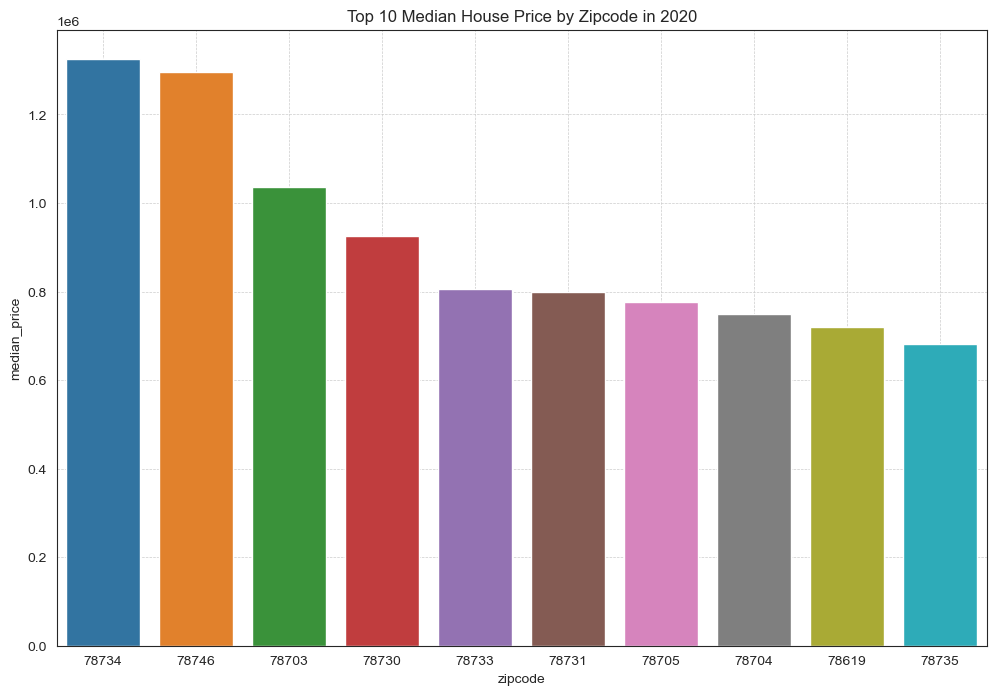

In [316]:
# 按邮政编码计算2020年的中位数房价
zipcode_price_data = geo_analysis_data[geo_analysis_data['latest_saleyear'] == 2020]

# 计算中位数房价并排序
median_price_per_zipcode = (zipcode_price_data[['zipcode', 'latestPrice']]
                            .groupby('zipcode')
                            .median()
                            .sort_values(by='latestPrice', ascending=False)
                            .rename(columns={'latestPrice': 'median_price'})
                            .reset_index()
                            .head(10)
                            )
# median_price_per_zipcode

# top_10_zipcodes

# 绘制条形图
plt.figure(figsize=(12, 8))
sns.barplot(x='zipcode',  y='median_price', data=median_price_per_zipcode, order=median_price_per_zipcode['zipcode'])
plt.title('Top 10 Median House Price by Zipcode in 2020')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('./outputs/Top_10_Median_house_price_by_zipcode.png')
plt.show()

#### Observation and Analysis

- **Highest home prices in ZIP codes 78734 and 78746**: The median home prices in these two areas are significantly higher than other regions, approaching or exceeding $1.2 million, indicating that these are high-end residential areas.
- **High home prices in ZIP codes 78703 and 78730 as well**: The median home prices in these two areas are close to $1 million but slightly lower than those in 78734 and 78746.
- **Moderate home prices in ZIP codes 78733, 78731, and 78705**: The median home prices in these areas range between $700,000 to $800,000, showing a balanced level.
- **Relatively low home prices in ZIP codes 78704, 78619, and 78735**: The median home prices in these areas are around or below $700,000, indicating relatively affordable pricing.
- **Significant price differences**: There is a notable disparity among different ZIP code regions; the difference between the highest and lowest medians is about $500,000, highlighting the substantial gap across Austin's various districts.

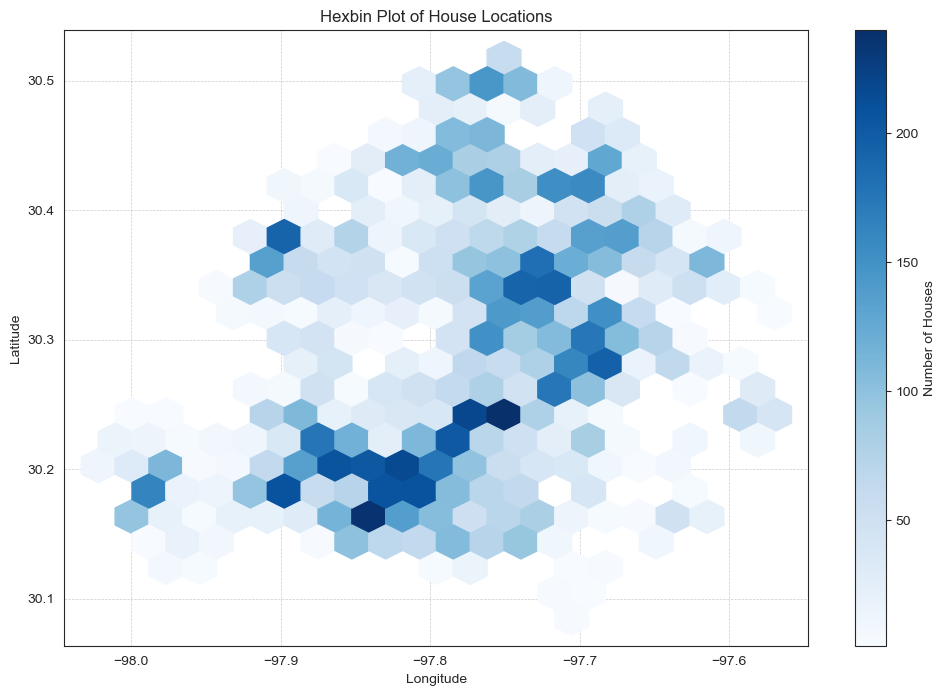

In [122]:
# Build hexbin plot about house distribution

plt.figure(figsize=(12, 8))
hb = plt.hexbin(geo_analysis_data['longitude'], geo_analysis_data['latitude'], gridsize=20, cmap='Blues', mincnt=1)
cb = plt.colorbar(hb, label='Number of Houses')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of House Locations')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('./outputs/hexbin_plot_of_house_locations.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

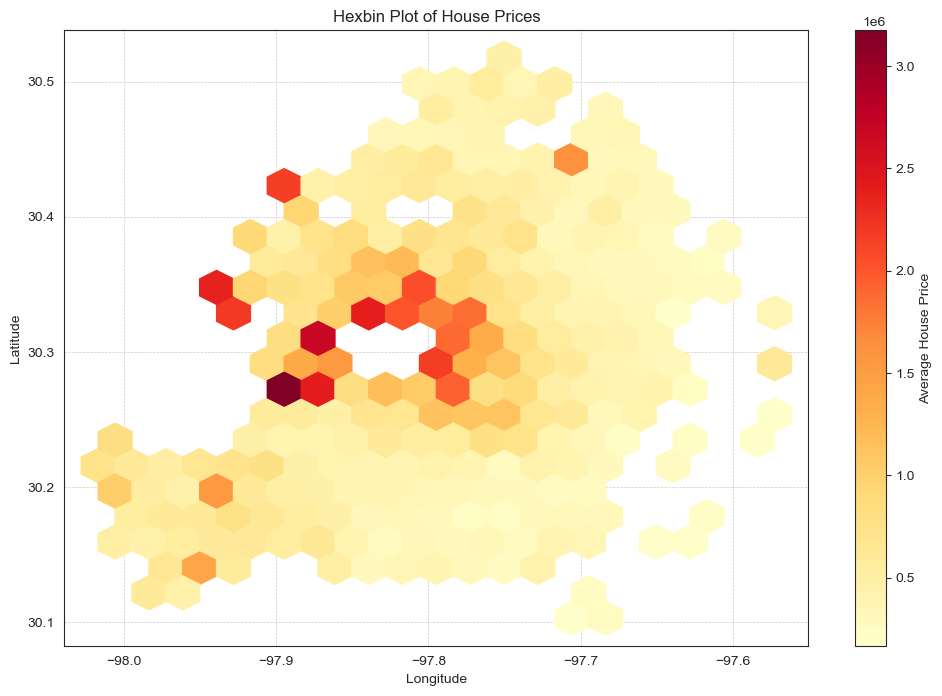

In [137]:
# Build hexbin plot about house price

geo_analysis_2020_data = geo_analysis_data[geo_analysis_data['latest_saleyear'] == 2020]

plt.figure(figsize=(12, 8))
plt.figure(figsize=(12, 8))

hb = plt.hexbin(geo_analysis_2020_data['longitude'], geo_analysis_2020_data['latitude'], C=geo_analysis_2020_data['latestPrice'],
                gridsize=20, cmap='YlOrRd', mincnt=1, reduce_C_function=np.mean)

cb = plt.colorbar(hb, label='Average House Price')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of House Prices')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('./outputs/hexbin_plot_of_house_prices in 2020.png')
plt.show()

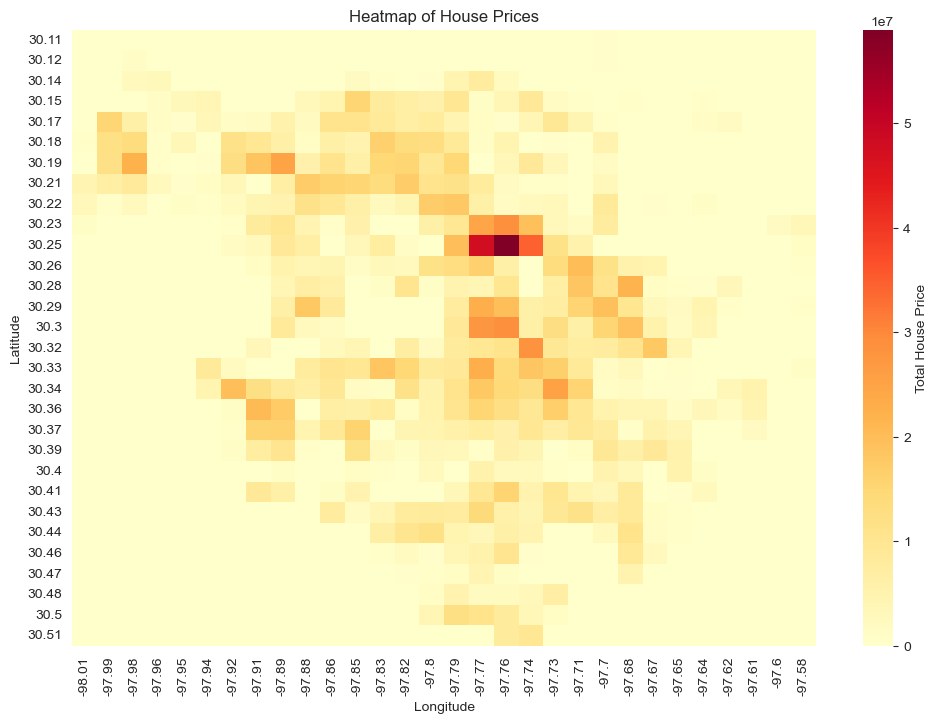

In [125]:
# Heat map of house price in 2020
plt.figure(figsize=(12, 8))

geo_analysis_2020_data = geo_analysis_data[geo_analysis_data['latest_saleyear'] == 2020]

# Create a 2D histogram with house locations as coordinates and house prices as weights.
heatmap, xedges, yedges = np.histogram2d(
    geo_analysis_2020_data['longitude'],
    geo_analysis_2020_data['latitude'],
    bins=(30, 30),
    weights=geo_analysis_2020_data['latestPrice']
)

# Calculate the center point of the heatmap for easier marking.
xcenters = 0.5 * (xedges[:-1] + xedges[1:])
ycenters = 0.5 * (yedges[:-1] + yedges[1:])

# Draw a heat map
sns.heatmap(heatmap.T, cmap='YlOrRd', cbar_kws={'label': 'Total House Price'},
            xticklabels=np.round(xcenters, 2),
            yticklabels=np.round(ycenters, 2))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of House Prices')
plt.show()

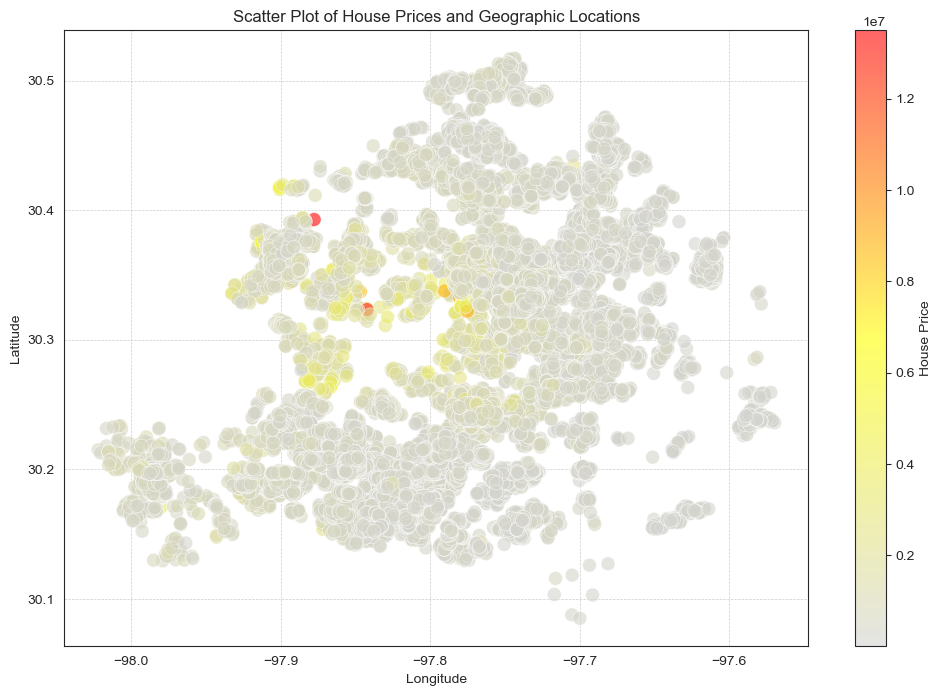

In [133]:
# Scatter plot
# dependence
import matplotlib.colors as mcolors
plt.figure(figsize=(12, 8))

# Customer filled color
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["lightgrey", "yellow", "red"])

# Build Scatter plot
scatter = plt.scatter(geo_analysis_data['longitude'], geo_analysis_data['latitude'],
                      c=geo_analysis_data['latestPrice'], cmap=cmap, s=100, alpha=0.6, edgecolors='w', linewidth=0.5)

# Add color
cbar = plt.colorbar(scatter)
cbar.set_label('House Price')

# Add Title and Labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of House Prices and Geographic Locations')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.savefig('./outputs/scatter_plot_of_house_locations_and_price.png')
plt.show()

### Part 3: Correlation Analysis

In [225]:
# Prepare the data
# Only keep these houses sold in 2020
filtered_data = raw_data[raw_data['latest_saleyear'] == 2020]

corr_analysis_data_cols = ['latestPrice', 'numOfBedrooms', 'numOfBathrooms',
                           'livingAreaSqFt','avgSchoolDistance', 'avgSchoolRating', 'yearBuilt'
                           ]
corr_analysis_data = filtered_data[corr_analysis_data_cols]

# Calculate the age of house
corr_analysis_data['house_age'] = 2020 - corr_analysis_data['yearBuilt']

corr_analysis_data['avgSchoolRating'] = round(corr_analysis_data['avgSchoolRating'], 1)

corr_analysis_data

,latestPrice,numOfBedrooms,numOfBathrooms,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,yearBuilt,house_age
1,295000.0,4,2.0,1768.0,1.400000,2.7,2013,7
5,309045.0,3,2.0,1446.0,1.066667,4.0,2020,0
6,315000.0,4,3.0,2432.0,1.233333,3.7,2016,4
10,279900.0,3,2.0,1580.0,1.200000,3.7,2016,4
12,239900.0,4,2.0,1762.0,0.633333,3.3,2005,15
...,...,...,...,...,...,...,...,...
15163,350000.0,3,1.0,1090.0,0.466667,7.0,1949,71
15164,1499000.0,6,5.0,3877.0,2.233333,5.7,2020,0
15165,280000.0,3,2.0,1420.0,2.133333,5.7,1983,37
15166,330000.0,3,2.0,1234.0,0.900000,3.3,1986,34


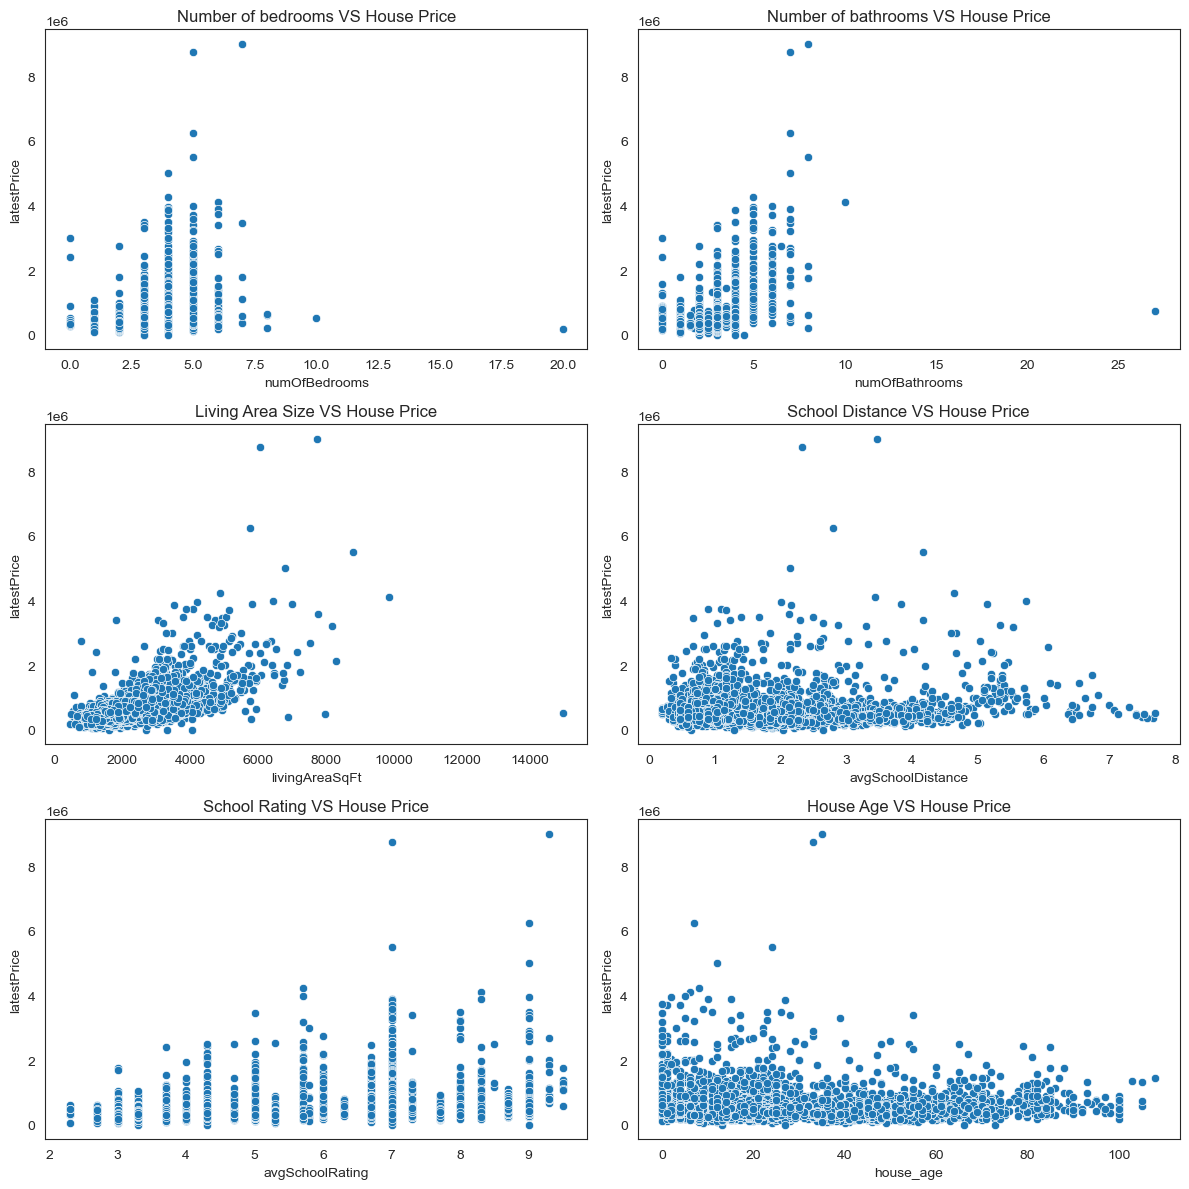

In [226]:
# Visualize the relationship between each variable and price

# Create a figure and set the size
fig1 = plt.figure(figsize=(12, 12))

# Plot Number of bedrooms VS price
fig1 = plt.subplot(321)
sns.scatterplot(data=corr_analysis_data,x='numOfBedrooms', y='latestPrice')
plt.title('Number of bedrooms VS House Price')

# Plot Number of bathrooms VS price
fig1 = plt.subplot(322)
sns.scatterplot(data=corr_analysis_data,x='numOfBathrooms', y='latestPrice')
plt.title('Number of bathrooms VS House Price')

# Plot livingAreaSqFt VS price
fig1 = plt.subplot(323)
sns.scatterplot(data=corr_analysis_data,x='livingAreaSqFt', y='latestPrice')
plt.title('Living Area Size VS House Price')

# Plot avgSchoolDistance VS price
fig1 = plt.subplot(324)
sns.scatterplot(data=corr_analysis_data,x='avgSchoolDistance', y='latestPrice')
plt.title('School Distance VS House Price')

# Plot avgSchoolRating VS price
fig1 = plt.subplot(325)
sns.scatterplot(data=corr_analysis_data,x='avgSchoolRating', y='latestPrice')
plt.title('School Rating VS House Price')

# Plot House age VS. Price
fig = plt.subplot(326)
sns.scatterplot(data=corr_analysis_data,x='house_age', y='latestPrice')
plt.title('House Age VS House Price')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


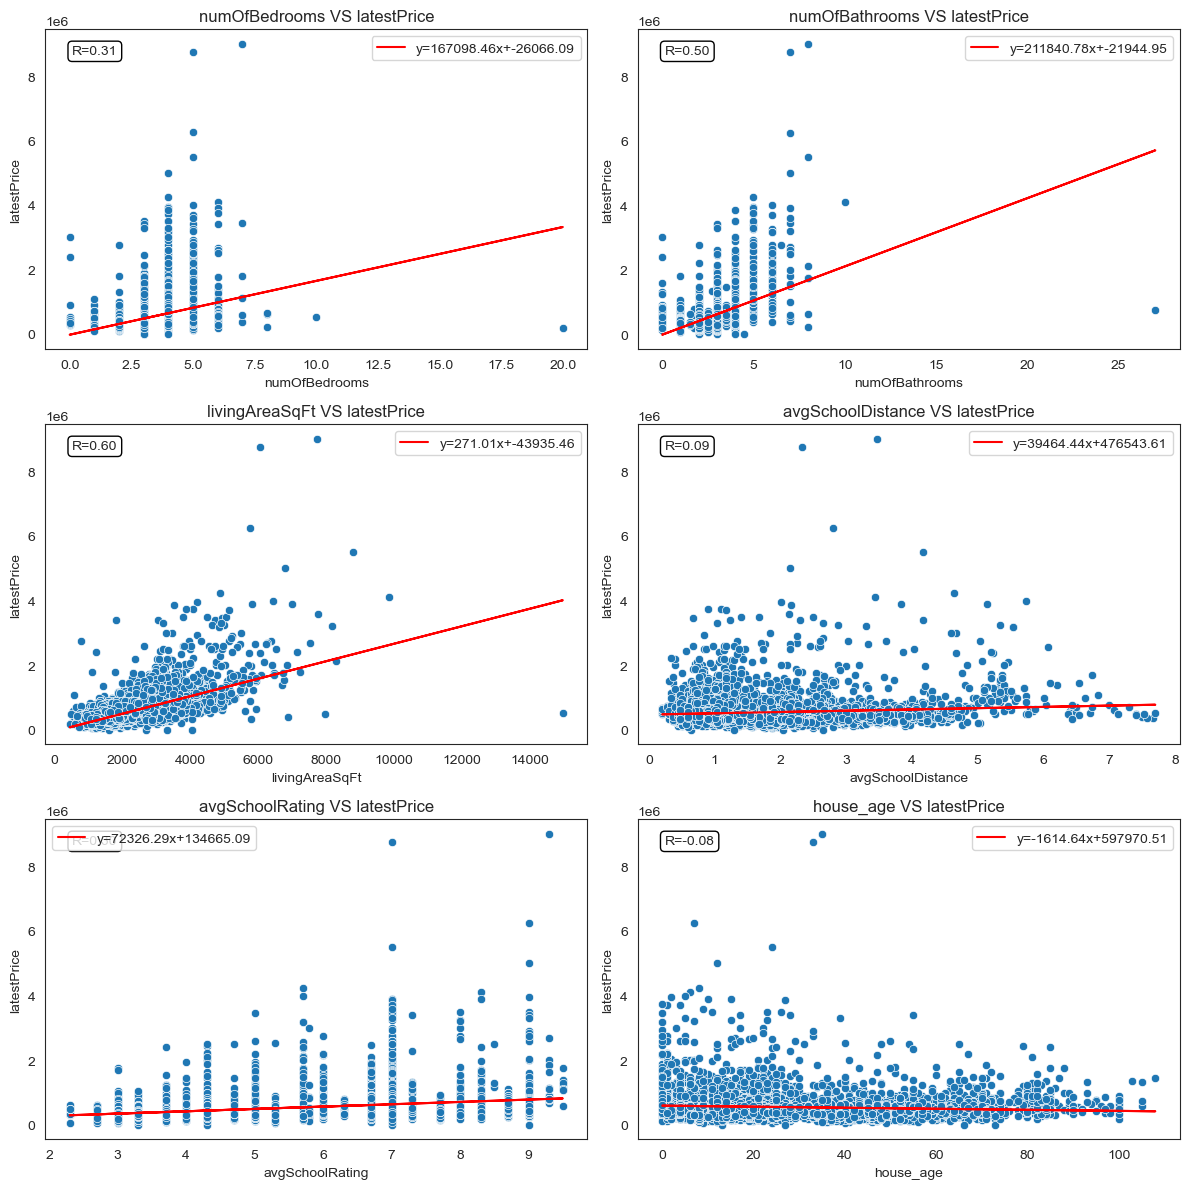

In [227]:
from scipy.stats import linregress

def plot_correlation(data, x, y, ax):
    # Plot scatter plot
    sns.scatterplot(data=data, x=x, y=y, ax=ax)

    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(data[x], data[y])
    line = slope * data[x] + intercept

    # Plot regression line
    ax.plot(data[x], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

    # Add annotation for correlation coefficient
    ax.annotate(f'R={r_value:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                ha='left', va='top', fontsize=10, bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

    ax.set_title(f'{x} VS {y}')
    ax.legend()

def plot_all_correlations(data):
    # Create figure and set size
    fig, axs = plt.subplots(3, 2, figsize=(12, 12))

    # Plot each feature vs. price
    plot_correlation(data, 'numOfBedrooms', 'latestPrice', axs[0, 0])
    plot_correlation(data, 'numOfBathrooms', 'latestPrice', axs[0, 1])
    plot_correlation(data, 'livingAreaSqFt', 'latestPrice', axs[1, 0])
    plot_correlation(data, 'avgSchoolDistance', 'latestPrice', axs[1, 1])
    plot_correlation(data, 'avgSchoolRating', 'latestPrice', axs[2, 0])
    plot_correlation(data, 'house_age', 'latestPrice', axs[2, 1])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Plot all correlation graphs
plot_all_correlations(corr_analysis_data)


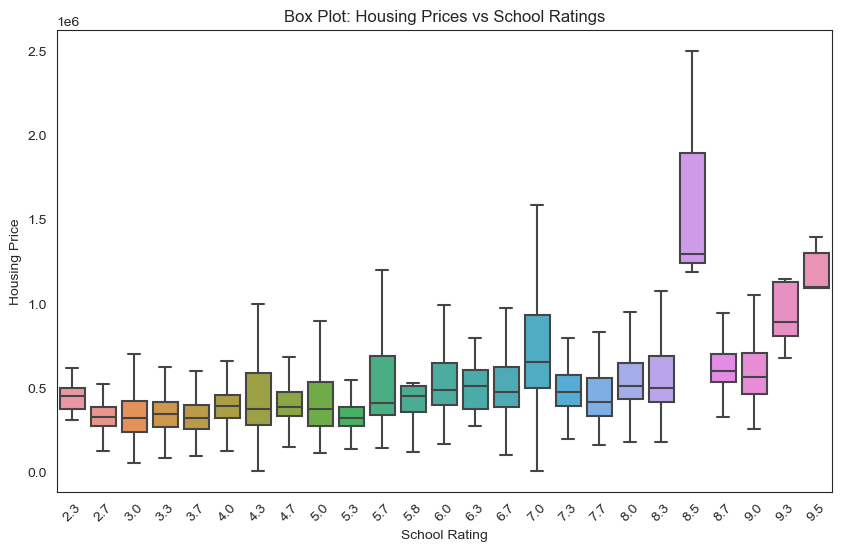

In [229]:
# Boxplot: The correlation between housing prices and school ratings

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=corr_analysis_data, x='avgSchoolRating', y='latestPrice',showfliers=False)
plt.title('Box Plot: Housing Prices vs School Ratings')
plt.xlabel('School Rating') 
plt.ylabel('Housing Price')
plt.xticks(rotation=45)
plt.savefig('./outputs/Box_Plot_Price_SchoolRating.png')
plt.show()

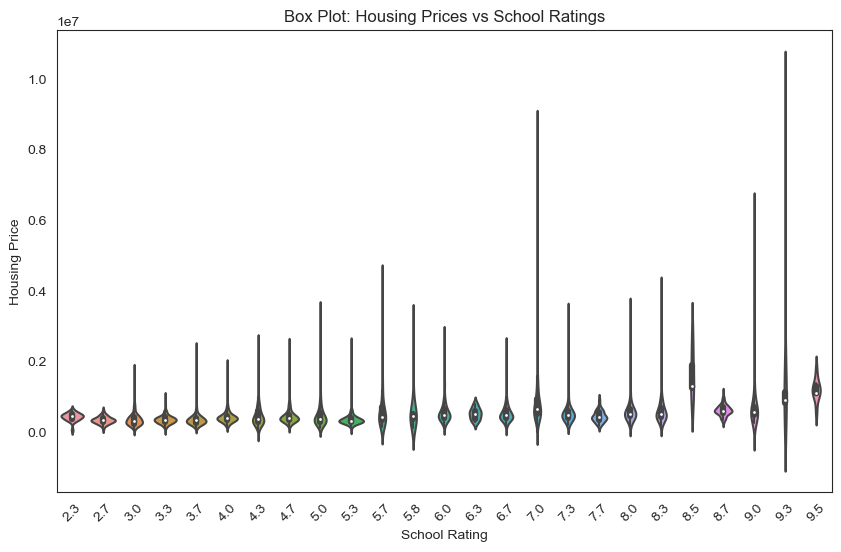

In [231]:
# violinplot: The correlation between housing prices and school ratings

# Plot box plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=corr_analysis_data, x='avgSchoolRating', y='latestPrice',showfliers=False)
plt.title('Violin Plot: Housing Prices vs School Ratings')
plt.xlabel('School Rating')
plt.ylabel('Housing Price')
plt.xticks(rotation=45)
plt.savefig('./outputs/Box_Plot_Price_SchoolRating.png')
plt.show()

## Part 4: Linear Regression Model Analysis

### Method 1: Multi-factor Linear Regression Model

In [250]:
# Dependence
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [251]:
# Features and target variable
X = corr_analysis_data[['numOfBedrooms', 'numOfBathrooms', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating', 'house_age']]
y = corr_analysis_data['latestPrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 114511564561.89328
R² Score: 0.4324581543348438


Evaluation of Model Results

1. Mean Squared Error (MSE):
• MSE is the average of the squares of the differences between predicted and actual values. The smaller the MSE value, the higher the prediction accuracy of the model.
• Your MSE value is relatively large, indicating that the model's prediction accuracy is low.

2. Coefficient of Determination (R² Score):
• The R² value represents how well independent variables explain variations in dependent variables, with a range from [0, 1].
• Your R² value is 0.432, indicating that the model can only explain 43.2% of house price variations, which suggests that the model's predictive ability is low.

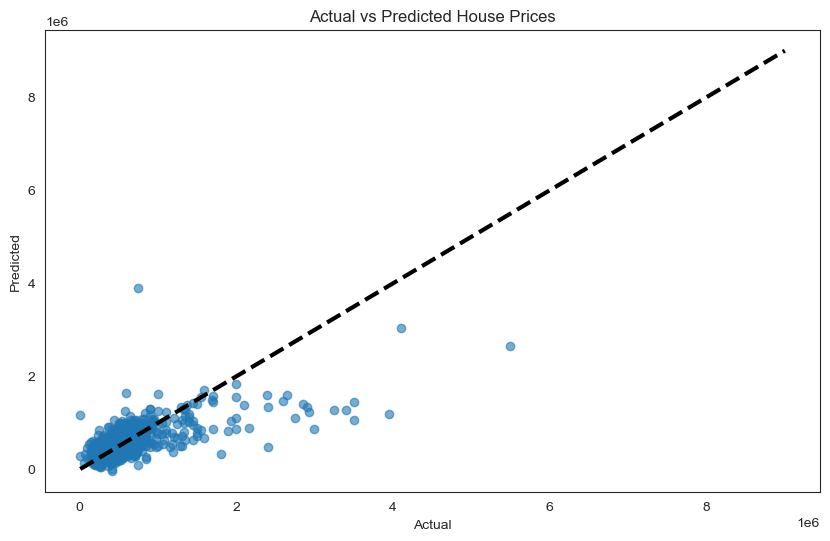

In [252]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()

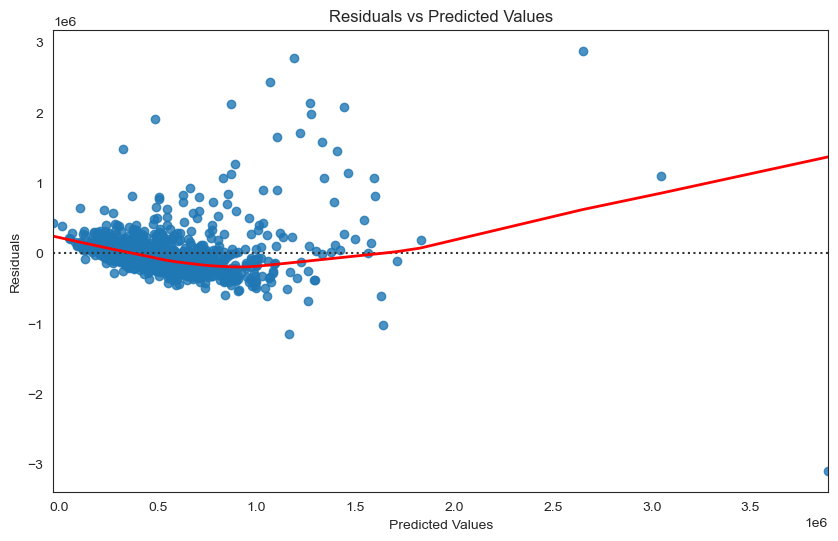

In [254]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

### RandomForest Model

Mean Squared Error (Random Forest): 77459605034.78448
R² Score (Random Forest): 0.6160949562244915


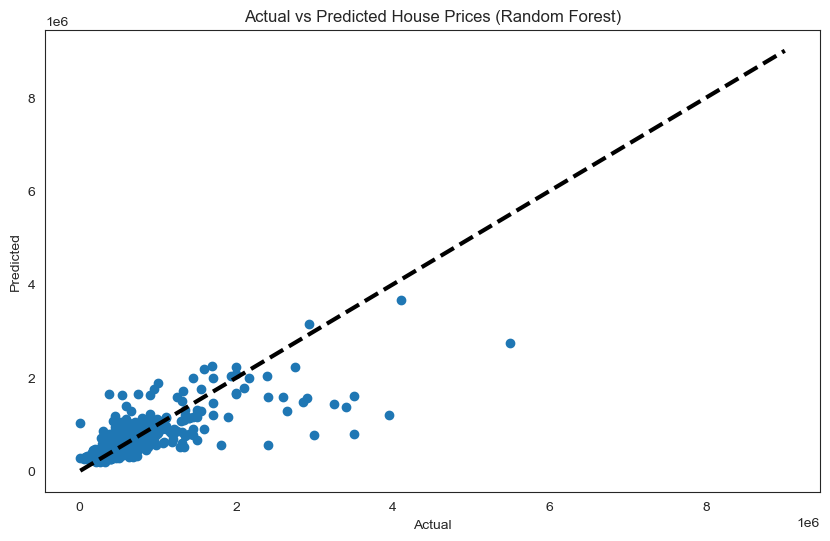

In [236]:
from sklearn.ensemble import RandomForestRegressor

# Create RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R² Score (Random Forest): {r2_rf}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices (Random Forest)')
plt.show()

### Feature Engineering


Mean Squared Error: 100081549372.13521
R² Score: 0.5771338475705657


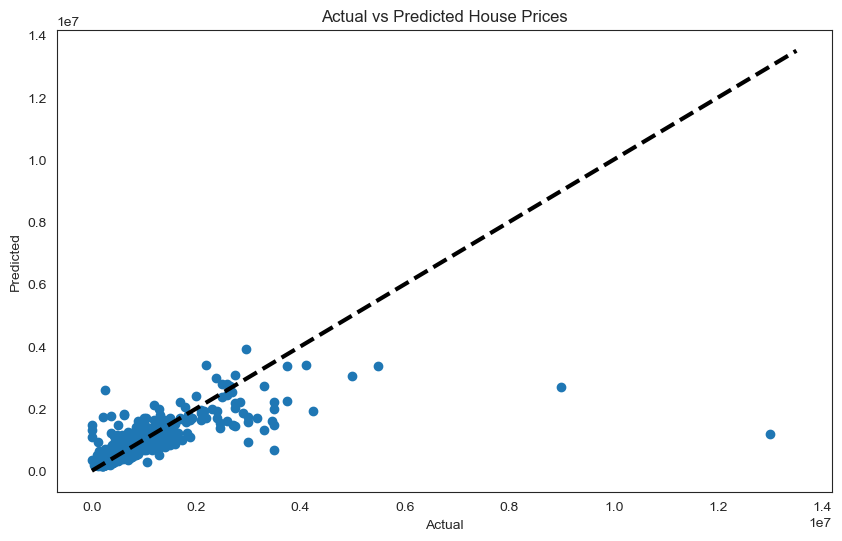

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=  13.9s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=100; total time=  14.6s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=  12.0s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=150; total time=  21.8s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=150; total time=  21.5s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=5, model__n_estimators=150; total time=  22.1s
[CV] END model__max_depth=20, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100; total time=  52.6s
[CV] END model__max_depth=20, model_

In [256]:
# Dependence
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create feature data
feature_data = raw_data.copy()

# Select useful features
selected_features = ['latitude', 'longitude', 'zipcode', 'propertyTaxRate', 'garageSpaces',
                     'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView', 'homeType',
                     'parkingSpaces', 'yearBuilt', 'numOfBathrooms', 'numOfBedrooms',
                     'livingAreaSqFt', 'lotSizeSqFt', 'avgSchoolDistance', 'avgSchoolRating']

# Create a new feature: the ratio of the number of rooms to the area of the house
feature_data['rooms_per_sqft'] = feature_data['numOfBedrooms'] / feature_data['livingAreaSqFt']
selected_features.append('rooms_per_sqft')

# Features and target variable
X = feature_data[selected_features]
y = feature_data['latestPrice']

# Numerical Features List
numeric_features = ['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
                    'parkingSpaces', 'yearBuilt', 'numOfBathrooms', 'numOfBedrooms',
                    'livingAreaSqFt', 'lotSizeSqFt', 'avgSchoolDistance', 'avgSchoolRating', 'rooms_per_sqft']

# Category Feature List
categorical_features = ['zipcode', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView', 'homeType']

# Preprocessing pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing pipelines for numerical and categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Combine preprocessing steps and the model into a single pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Traning model
pipeline.fit(X_train, y_train)

# prediction
y_pred = pipeline.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plot a comparison chart of actual values and predicted values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Parameter tuning optimization
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with more focused ranges
param_grid = {
    'model__n_estimators': [100, 150],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Mean Squared Error (Best Model): 98105978363.12245
R² Score (Best Model): 0.5854810615842705


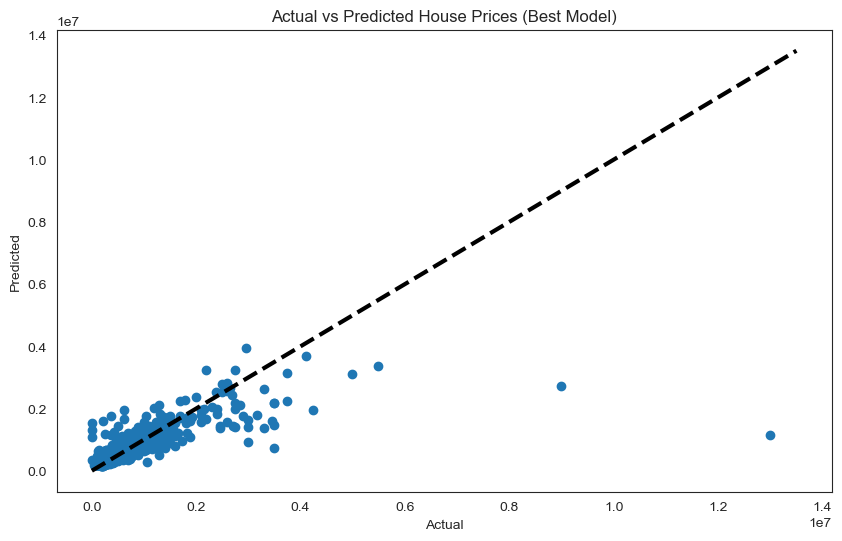

In [257]:
# 使用最佳参数组合重新训练模型
best_pipeline = grid_search.best_estimator_
best_pipeline.fit(X_train, y_train)

# 进行预测
y_pred_best = best_pipeline.predict(X_test)

# 评估模型
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Mean Squared Error (Best Model): {mse_best}')
print(f'R² Score (Best Model): {r2_best}')

# 绘制实际值和预测值的对比图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices (Best Model)')
plt.show()

In [260]:
# feature importance analysis
importances = best_pipeline.named_steps['model'].feature_importances_
feature_names = numeric_features + list(best_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display feature_importance_df
feature_importance_df = (feature_importance_df
                         .sort_values(by='Importance', ascending=False)
                         .reset_index()
                         )
feature_importance_df

,index,Feature,Importance
0,8,livingAreaSqFt,0.448443
1,9,lotSizeSqFt,0.109375
2,6,numOfBathrooms,0.066218
3,0,latitude,0.056620
4,21,zipcode_78704,0.045525
...,...,...,...
76,16,zipcode_78653,0.000000
77,18,zipcode_78701,0.000000
78,76,homeType_Other,0.000000
79,42,zipcode_78738,0.000000


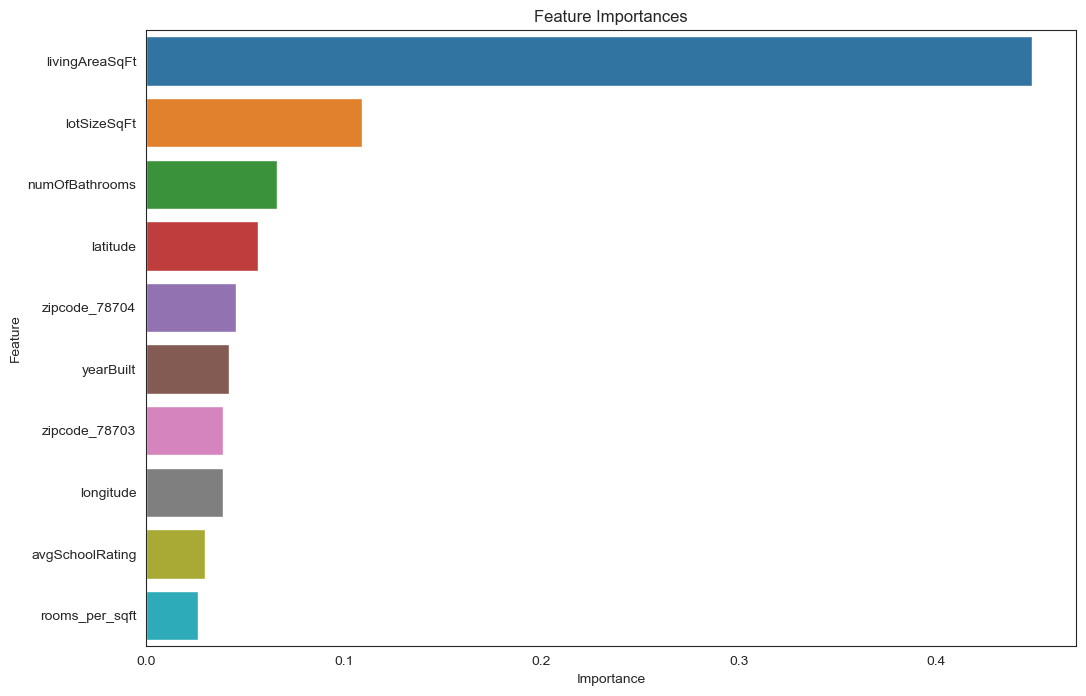

In [261]:
# Build a bar plot of Top 10 feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

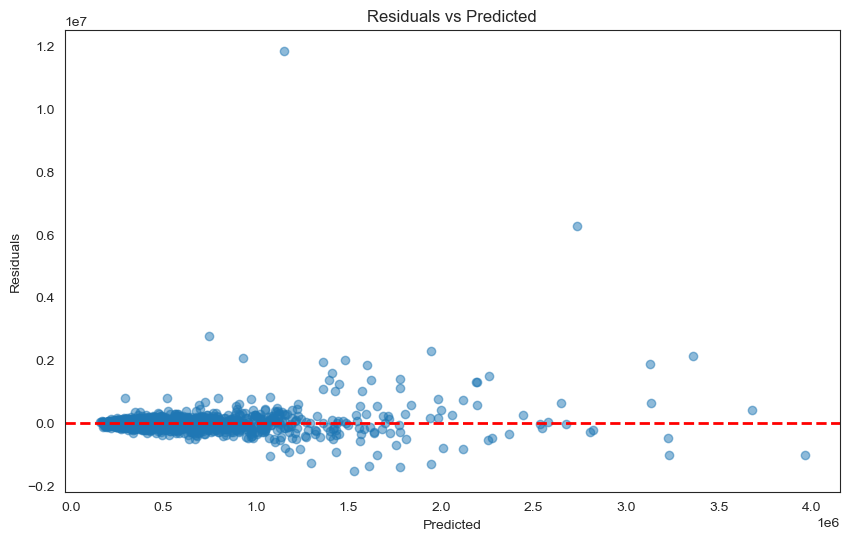

In [262]:
# Residual analysis
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()